<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/data_courses_AI_ML/intro to neural netwrok/Bank Churn Prediction/Churn.csv'
df=pd.read_csv(path)

## Data Overview

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are no missing values in this dataset.
- Three variables are objects: surname, geography, and gender.



In [7]:
print(f'the data have {df.shape[0]} rows and {df.shape[1]} columns')

the data have 10000 rows and 14 columns


In [8]:
df.duplicated().sum()

0

no duplicated in our dataset

## Exploratory Data Analysis

In [9]:
df.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

- Credit Score: The mean and median are approximately 650, suggesting a potentially normal distribution.
- Approximately half of the customers (5014) are located in France.
- Age ranges from 18 to 92, covering all age categorie.
- Despite a wide age range, customer tenure is relatively consistent with a maximum of 10 years, minimum of 3 years, and median of 5 years.
- 25% of the account balance have 0, median is 97k and max is 250k , with a stAccount balance exhibits high variance with a minimum of 0, median of 97k, maximum of 250k, and standard deviation of 62k. The distribution is left-skewed, with 25% of accounts having a balance of 0.
- 25% of customers are inactive.
- 25% of customers do not have a credit card.
- Estimated salary has a minimum of 11.58, which warrants further investigation.

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


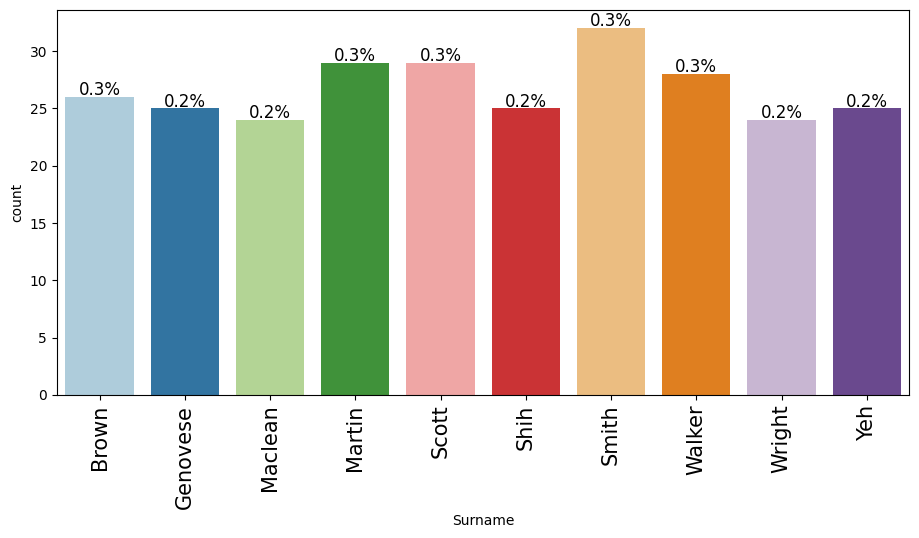

In [13]:
labeled_barplot(df, 'Surname',perc=True,n=10)

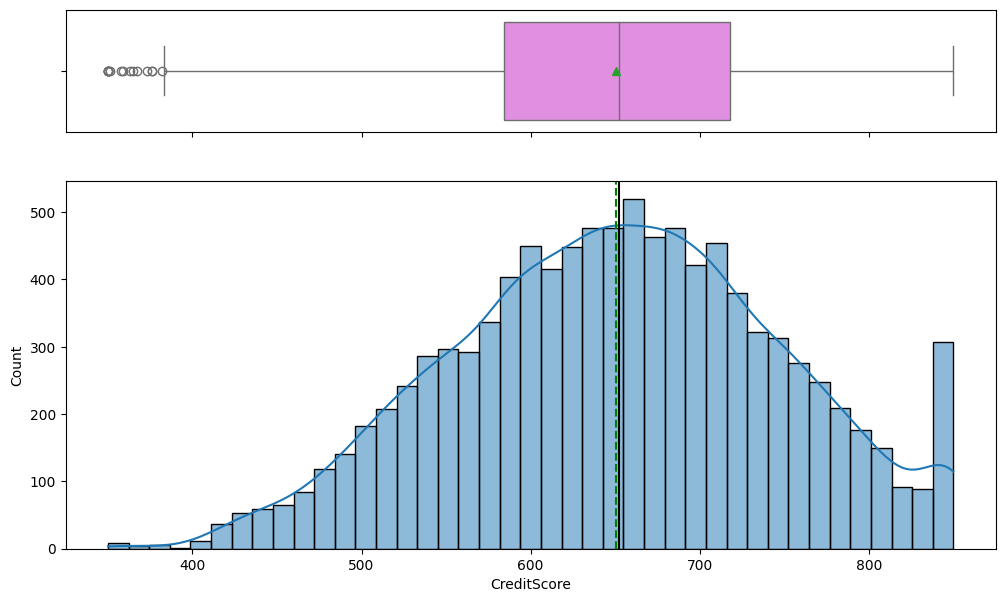

In [14]:
histogram_boxplot(df, 'CreditScore',kde=True)

In [15]:
max_crscore=df['CreditScore'].max()
max_crscore

850

In [16]:
df[df['CreditScore']==max_crscore]['CreditScore'].count()

233

- The distribution of credit scores appears to be normal.
- There are outliers on the left side of the box plot.
- A credit score of 830, considered the maximum and indicative of strong financial health, is achieved by 233 customers. This value skews the normal distribution

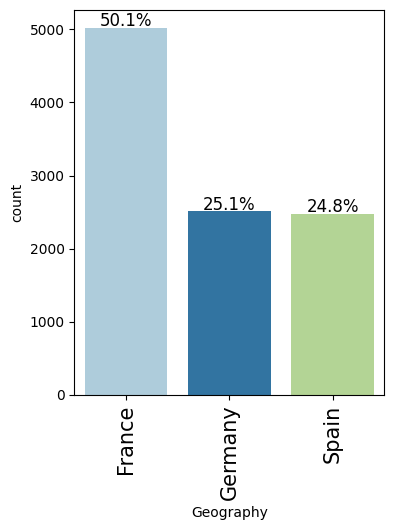

In [17]:
labeled_barplot(df, 'Geography',perc=True)

As previously mentioned, 50% of customers are located in France, while 25% reside in Germany and 25% in Spain. This indicates that our analysis focuses on customers from these three countries.

- **Note**: It is essential to consider the financial potential and individual income variations across France, Spain, and Germany.

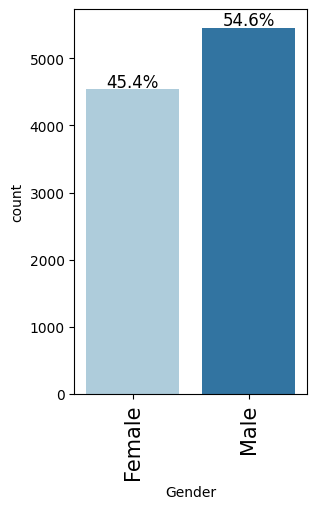

In [18]:
labeled_barplot(df, 'Gender',perc=True)

Males constitute 54.6% of the dataset, slightly outnumbering females at 45.4%.

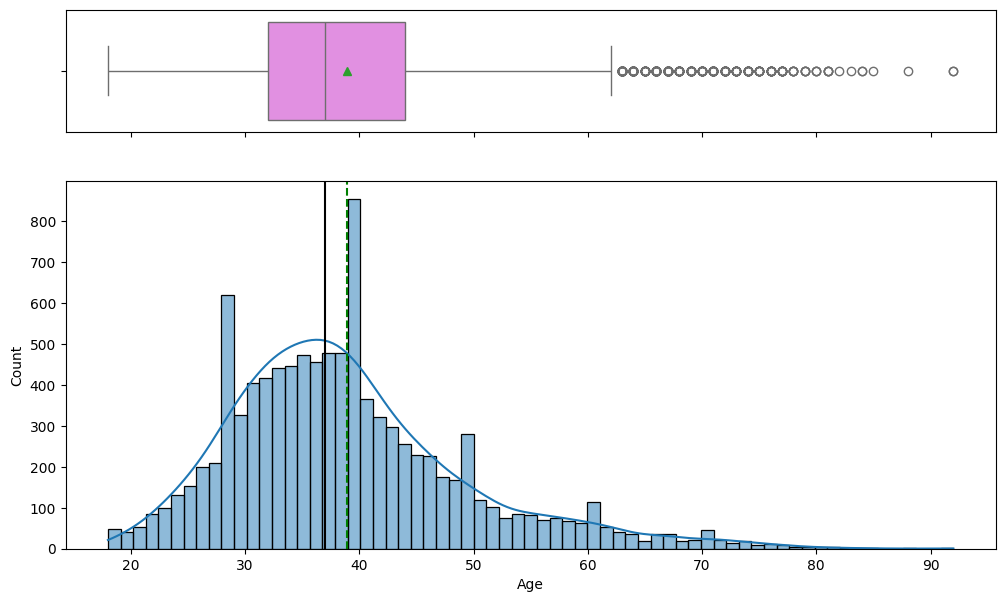

In [19]:
histogram_boxplot(df, 'Age',kde=True)

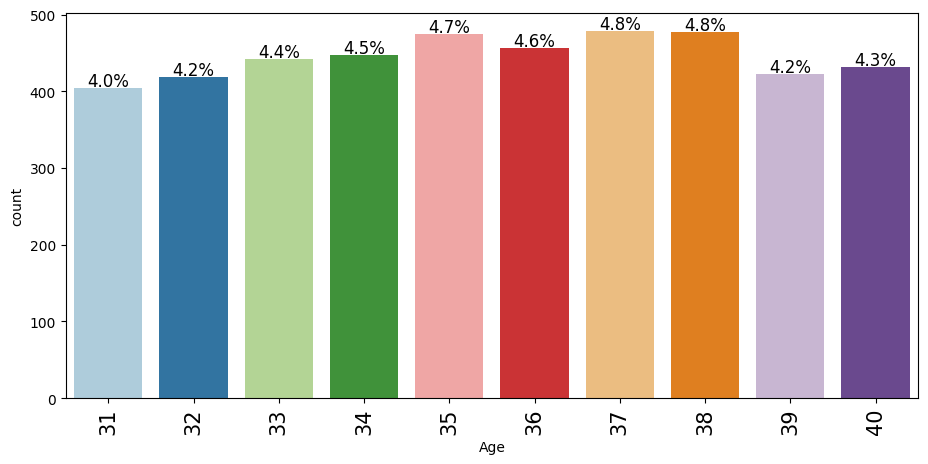

In [20]:
labeled_barplot(df, 'Age',perc=True,n=10)

- This dataset covers all age categories and exhibits a slightly normal distribution centered around a mean of 40, with the presence of outliers
- Most of the ages presented in the data are between 31 and 40

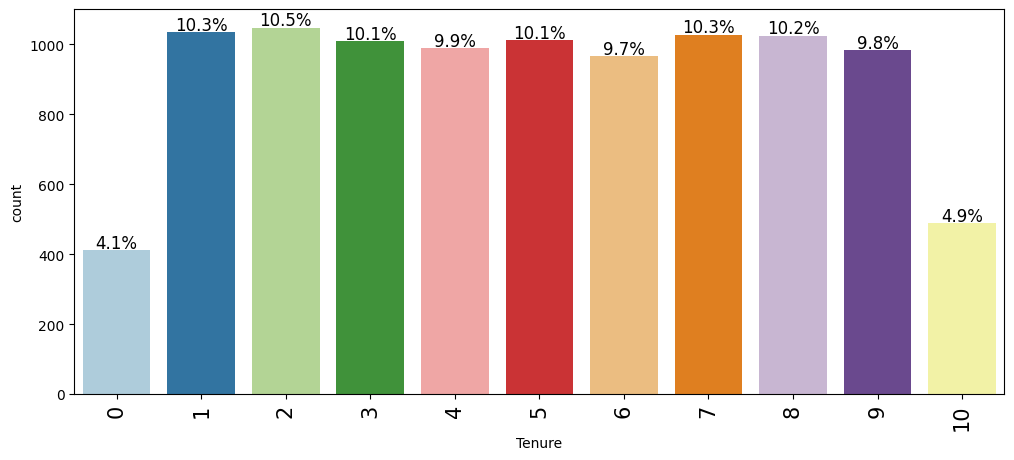

In [21]:
labeled_barplot(df, 'Tenure',perc=True)

- Customers with 10 years with the bank represent almost 5% of the customer base.
- Customers with 0 years tenure also represent almost 5% of the customer base.
- Customers with 1 to 9 years tenure represent approximately 10% of the customer base each.

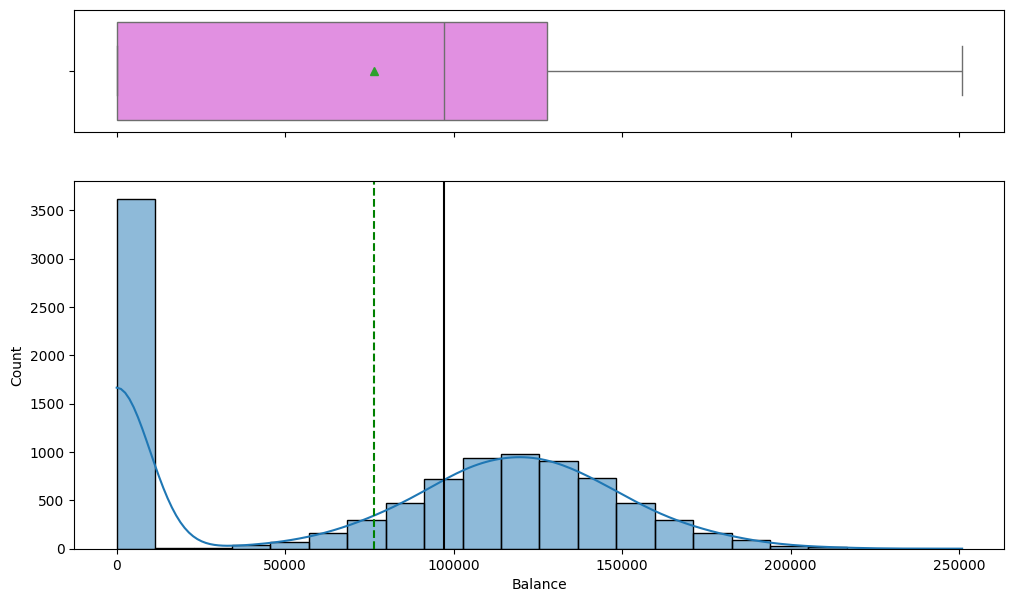

In [22]:
histogram_boxplot(df, 'Balance',kde=True)

In [23]:
df[df['Balance']==0].shape[0]

3617

- 3,617 customers have a zero balance in their accounts.
- Excluding the zero balance accounts, account balances are normally distributed.
- The mean balance is approximately 100K

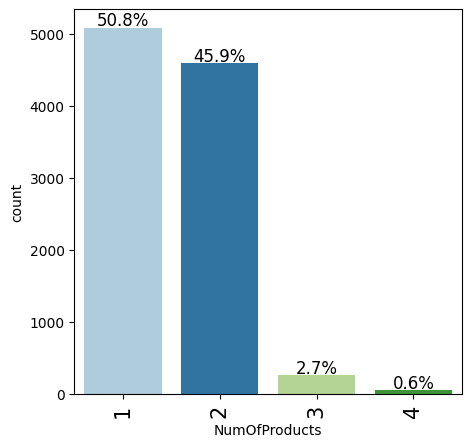

In [24]:
labeled_barplot(df, 'NumOfProducts',perc=True)

- 50% of customers purchase one product from the bank.
- 45.9% of customers purchase two products from the bank.
- 2.7% of customers purchase three products from the bank.
- 0.6% of customers purchase four products from the bank.

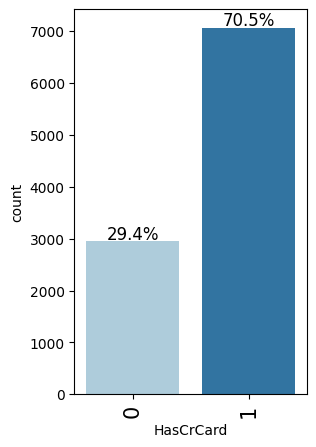

In [25]:
labeled_barplot(df, 'HasCrCard',perc=True)

70.5% has credit card

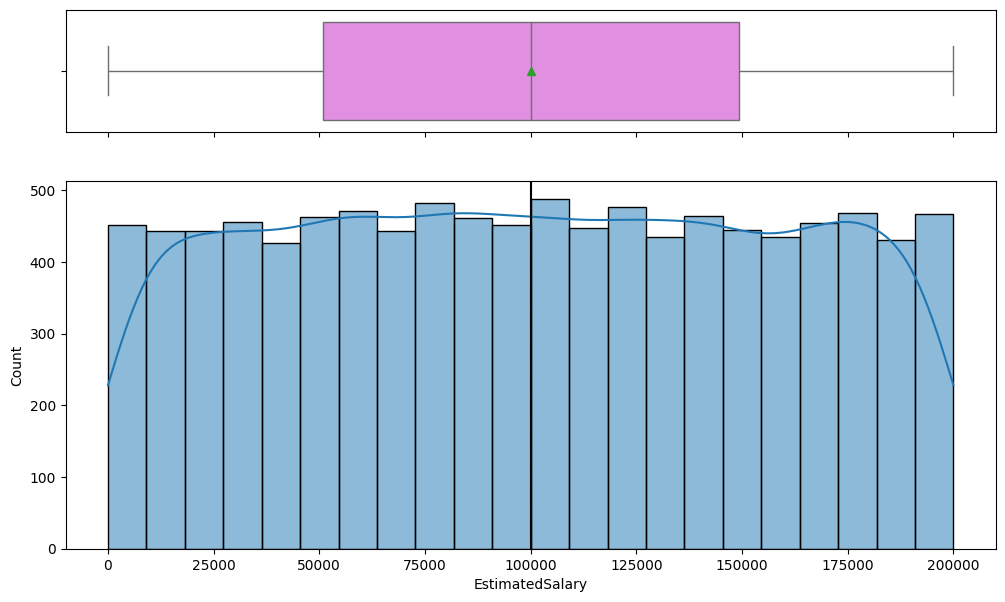

In [26]:
histogram_boxplot(df, 'EstimatedSalary',kde=True)

In [27]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

the min in the estimation salary doesn't make any sense . let's try to understand behind this variable

In [28]:
min_salary = df['EstimatedSalary'].min()
# Condition: Examine salaries greater than the minimum and less than 15,000.
count_min_salary = (df['EstimatedSalary'] > min_salary) & (df['EstimatedSalary'] < 15000 )
count_min_salary.sum()

749

Assuming a minimum wage of 15,000 (which is inaccurate as it's actually above 25,000 with a maximum of 200,000) for the countries considered, we have 749 data points in this category. Let's delve deeper into these categories

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

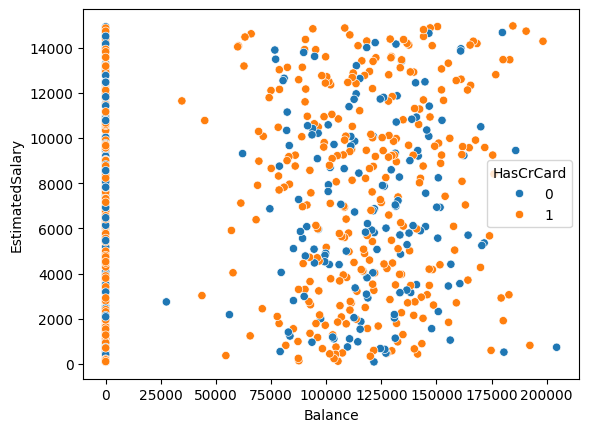

In [29]:
df_filtred=df[count_min_salary]
sns.scatterplot(df_filtred.sort_values(by='Balance',ascending=False),x='Balance',y='EstimatedSalary',hue='HasCrCard')

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

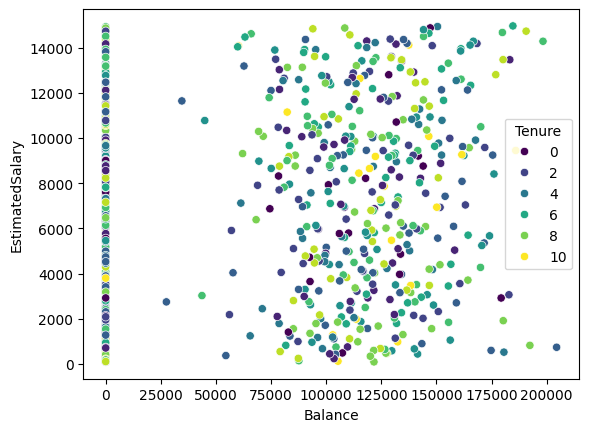

In [30]:
sns.scatterplot(df_filtred.sort_values(by='Balance',ascending=False),x='Balance',y='EstimatedSalary',hue='Tenure',palette='viridis')

The scatter plots reveal that a majority of these categories possess credit cards with balances exceeding 25,000, and many of these cardholders have maintained accounts for over two years. This is inconsistent with the bank's requirement of a minimum annual income of 15,000 for new customers.

**Conclusion:**

- These values likely represent errors, typos, or misestimates.
- I propose treating these as missing values, and fill them in later with the appropriate method.
- If we account for these errors, the distribution would likely exhibit a slight left skew with a mean of 100,000.

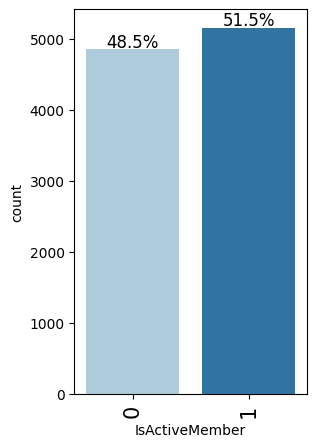

In [31]:
labeled_barplot(df, 'IsActiveMember',perc=True)

Approximately half of the bank's customers are inactive

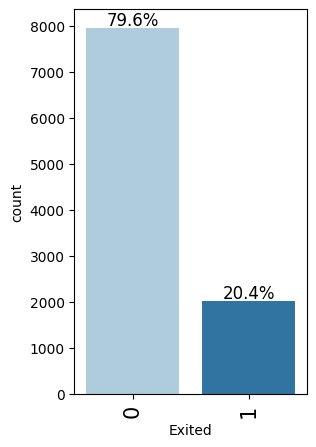

(None,)

In [32]:
labeled_barplot(df, 'Exited',perc=True),

- This is the target variable and it is imbalanced, with only 20.4% of customers having left the bank

### Bivariate Analysis

Let's drop unnecessary features to improve the plot's appearance

In [33]:
df1=df.copy()

In [34]:
df1.Surname.value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [35]:
df1.RowNumber.unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [36]:
df1.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True) # in my opinion, RowNumber, CustomerID and surname are unnecessary

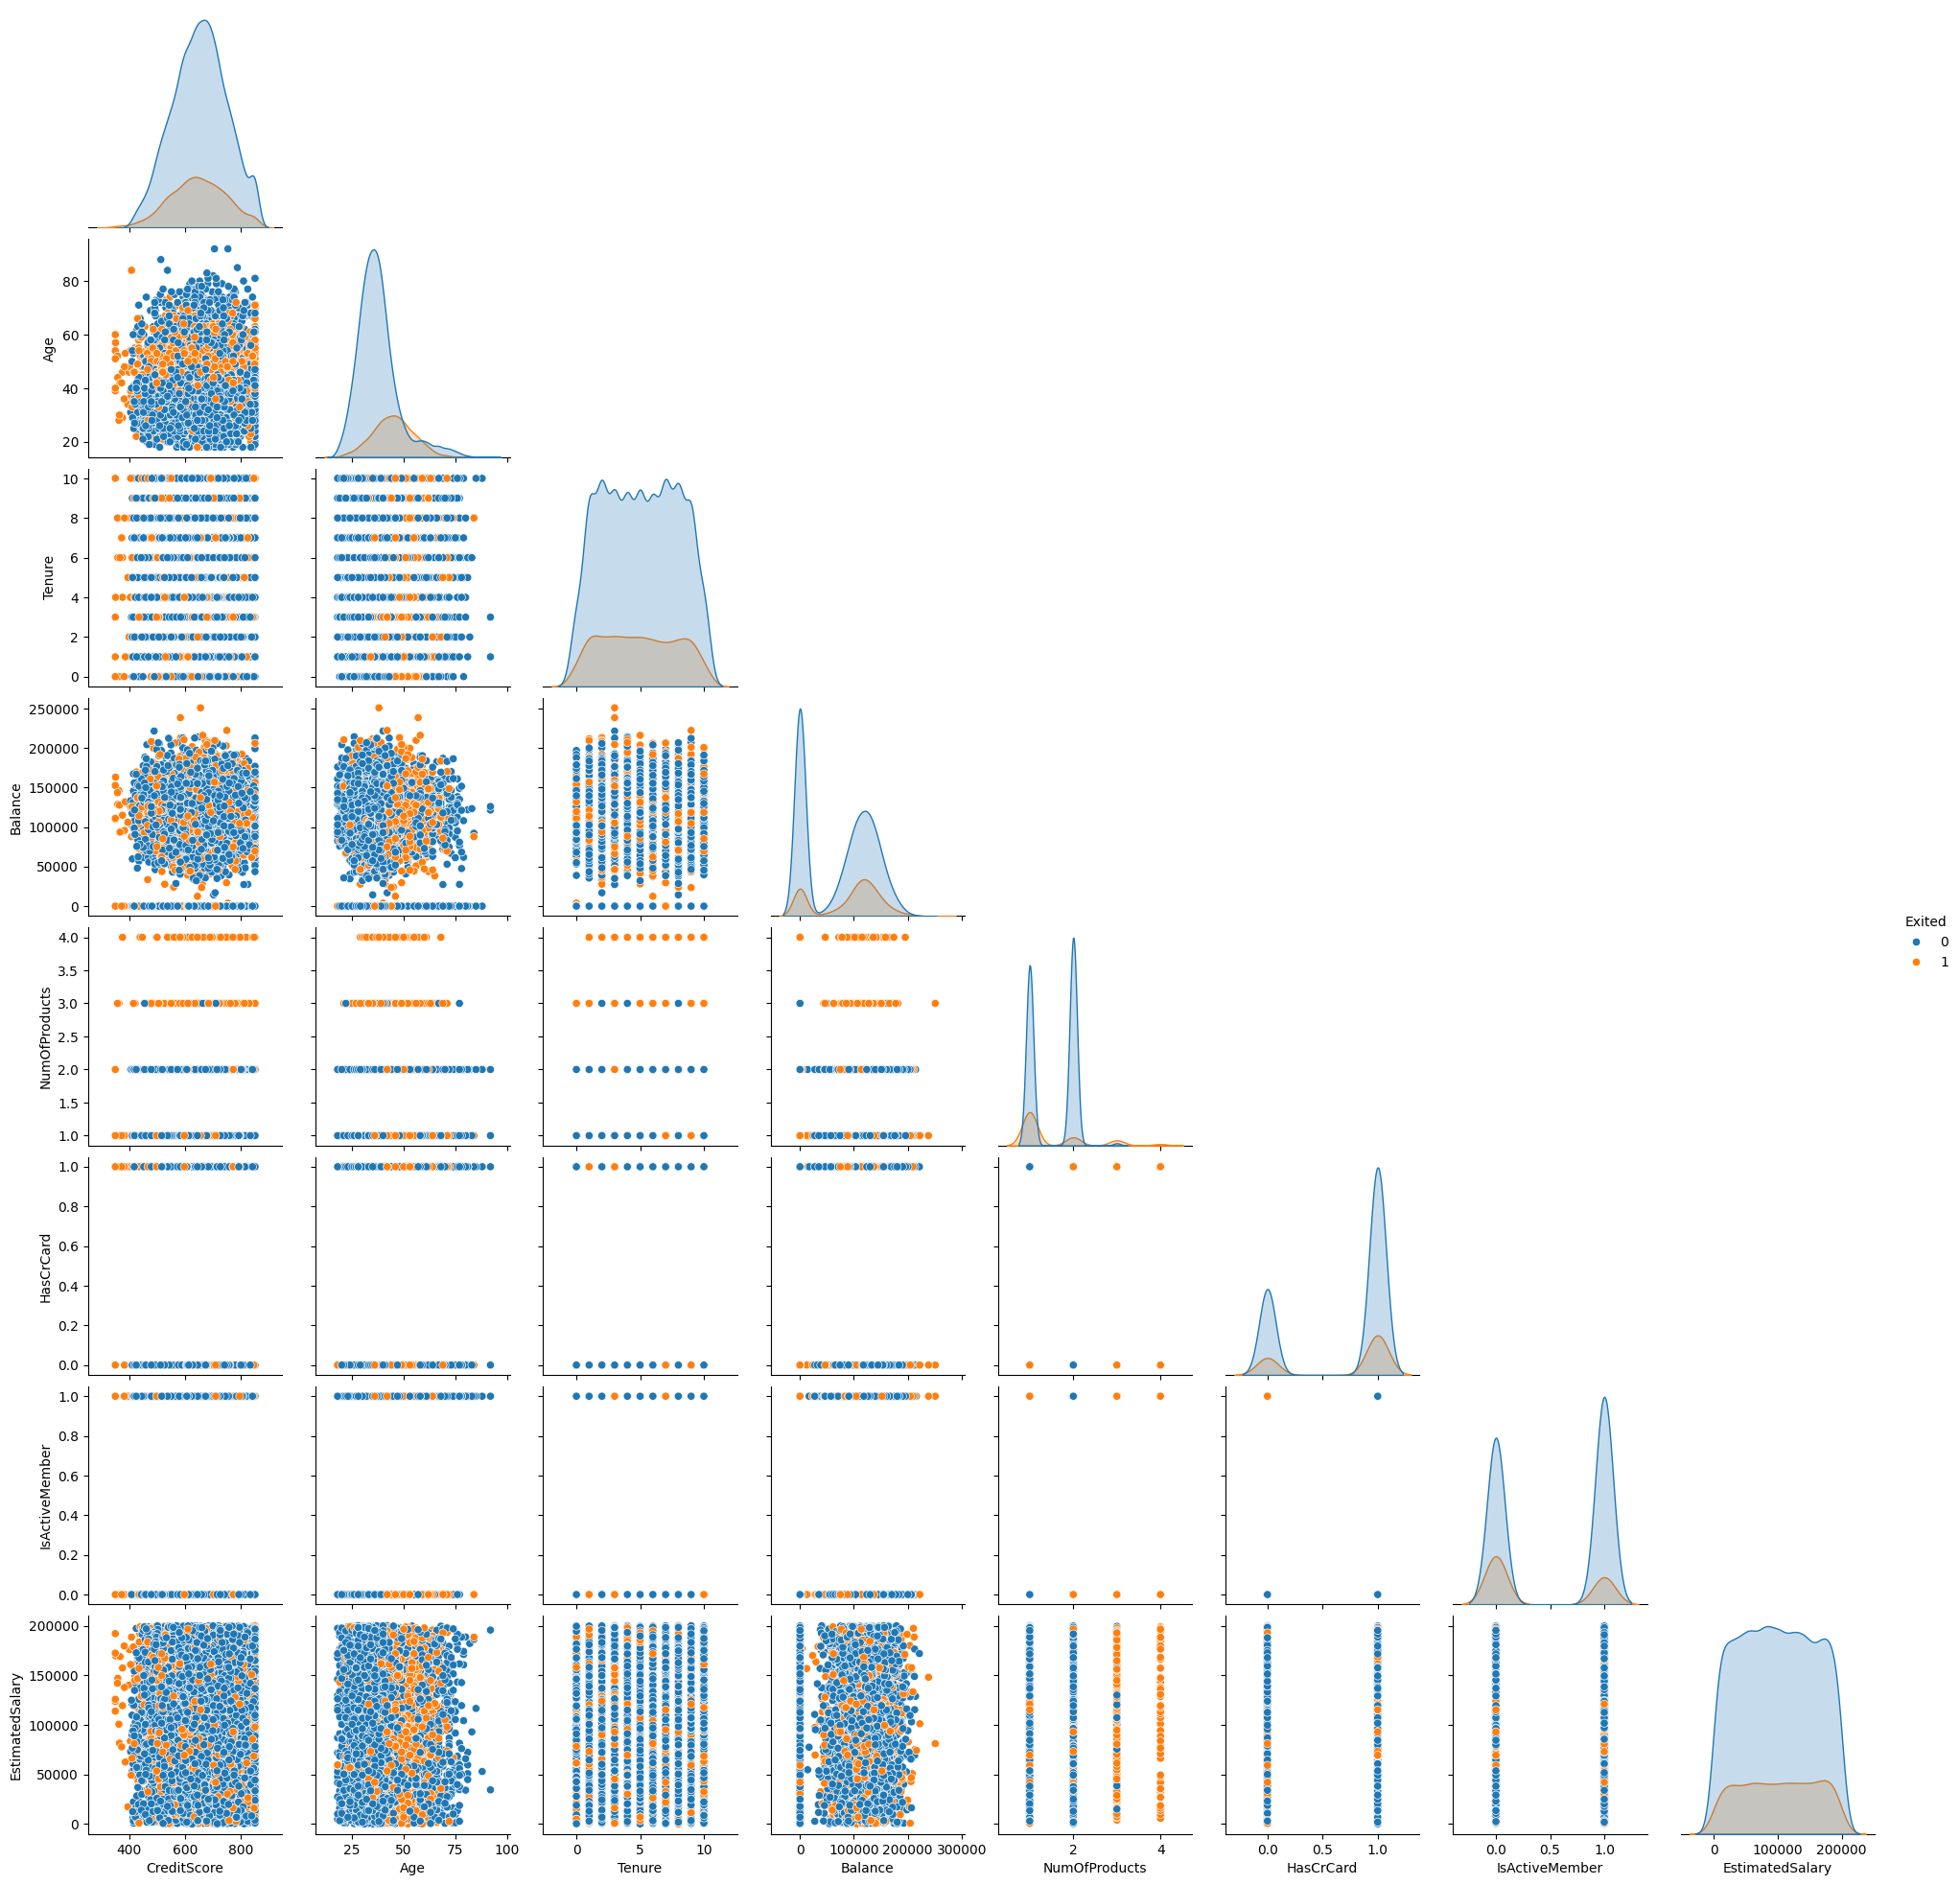

In [37]:
sns.pairplot(df1,hue='Exited',corner=True)

- **Age vs Credit Score**: Customers around age 30 tend to churn regardless of credit score.
- **Balance vs Age**: A significant number of customers around age 40 with varying balances have churned.
- **Tenure vs Ag**e: Customers aged around 50 with different tenure lengths are more likely to churn.
- **NumOfProducts vs Tenur**e: Customers purchasing 3 or 4 products have high churn rates, irrespective of tenure.
- **NumOfProducts vs Age**: Customers purchasing 3 or 4 products exhibit high churn rates across age groups.
- **NumOfProducts vs Balance**: Customers purchasing 3 or 4 products tend to churn, regardless of their balance.
- **NumOfProducts vs Credit Score**: Customers with more than 3 products have high churn rates across various credit score categories.
- **NumOfProducts vs HasCrCard**: Credit card ownership seems to have little impact on churn rates for customers with 3 or 4 products.
- **EstimatedSalary vs Age**: A large customer segment around age 50 has churned, irrespective of their estimated salary.
- **EstimatedSalary vs NumOfProducts**: Customers purchasing 3 or 4 products exhibit high churn rates across different salary levels.

**Remark**  :      the number of products a customer purchases (3 or 4 in this case) is a strong indicator of churn. This finding holds true regardless of other factors like age, account balance, credit score, and even credit card ownership

<Axes: xlabel='NumOfProducts', ylabel='Tenure'>

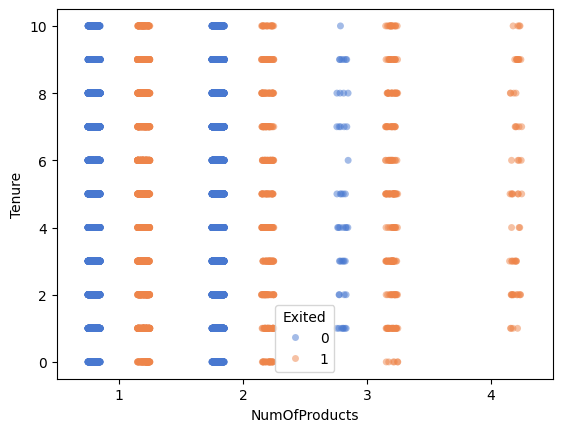

In [38]:
sns.stripplot(data=df1, x='NumOfProducts', y='Tenure', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')

- All customers who have 4 products left the bank.
- More than half of the customers with 3 products left the bank. Less churned customers in this category have been with the bank for 10, 8, or 6 years.
- Half of the customers who have 1 or 2 products are churned across all tenure values.

<Axes: xlabel='NumOfProducts', ylabel='Age'>

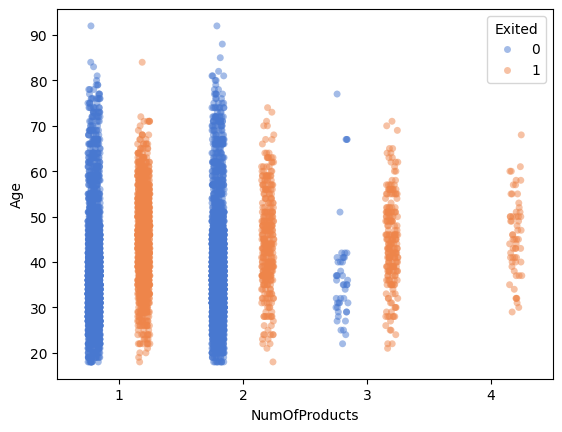

In [39]:
sns.stripplot(data=df1, x='NumOfProducts', y='Age', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')

- for different age , the customers with 4 products have left the bank
- for all ages . customes who left the bank are more then who stays , specially some customers under 45 years have not left the bank
- some customers aged less than 85 that have  purchase 2 products from the bank left compared more that stays with the bank
- less customers that left aged less than 85 with one product than who stays


<Axes: xlabel='NumOfProducts', ylabel='Balance'>

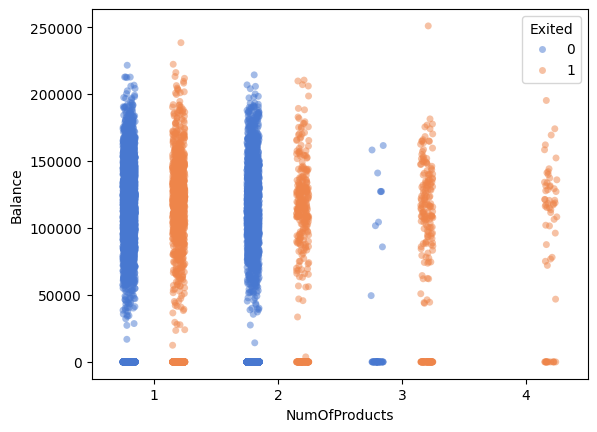

In [40]:
sns.stripplot(data=df1, x='NumOfProducts', y='Balance', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')

- All customers who purchased 4 products left the bank regardless of their balance.
- A few customers who have 3 products and a balance between 50,000 and 170,000 remained with the bank, while most left. Note: Some balance values are missing and will require imputation.
- For customers with 1 or 2 products, approximately half remained with the bank, while the other half left.

<Axes: xlabel='NumOfProducts', ylabel='CreditScore'>

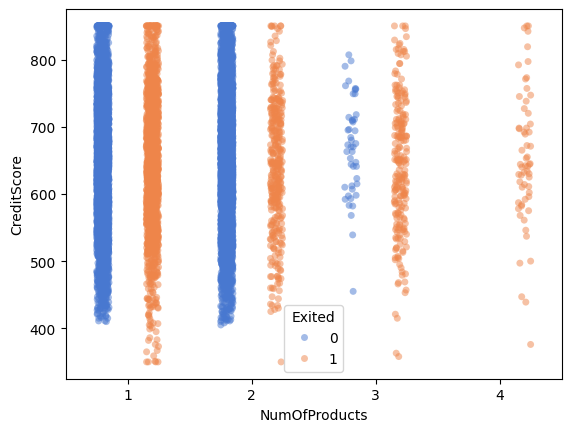

In [41]:
sns.stripplot(data=df1, x='NumOfProducts', y='CreditScore', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')

- All customers who purchased 4 products left the bank regardless of their credit score.
- A few customers with credit scores between 550 and 800 who have 3 products remained with the bank, while most with other credit scores left.
- Approximately the same number of customers with 1 or 2 products left the bank as stayed regardless of their credit score.

<Axes: xlabel='NumOfProducts', ylabel='HasCrCard'>

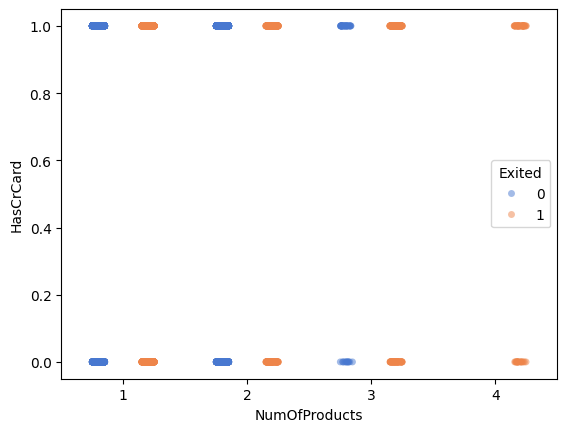

In [42]:
sns.stripplot(data=df1, x='NumOfProducts', y='HasCrCard', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')
#sns.boxplot(data=df1, x='NumOfProducts', y='CreditScore', hue='Exited', dodge=True,
  #            palette='muted')

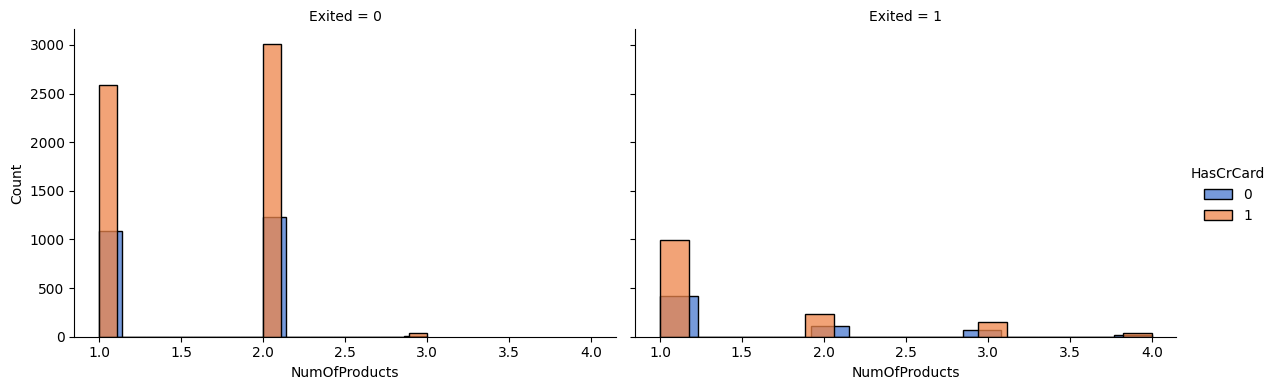

In [43]:
g = sns.FacetGrid(df1, col='Exited', hue='HasCrCard', palette='muted', height=4, aspect=1.5)
g.map(sns.histplot, 'NumOfProducts')
g.add_legend()

- All customers who purchased 4 products from the bank left, regardless of whether they had a credit card or not. However, most of these customers did have a credit card
- Most customers who stayed with the bank and had 3 products also had a credit card. Similarly, many customers who left with 3 products had credit cards, but some did not
-There were 3000 customers with 2 products and a credit card who stayed with the bank. Of these, 1100 did not have a credit card
- Approximately 1000 customers with credit cards left the bank, compared to over 2500 who stayed with credit cards. However, 500 customers left without a credit card, and more than 1000 stayed without a credit card. All customers who stayed or left without a credit card had purchased one product from the bank

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

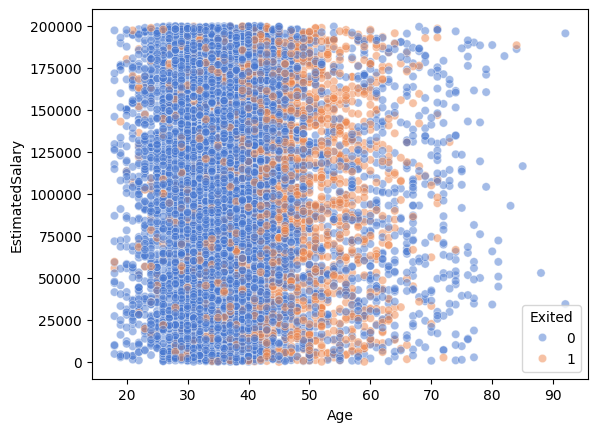

In [44]:
sns.scatterplot(data=df1, x='Age', y='EstimatedSalary', hue='Exited',
               marker='o', alpha=0.5, palette='muted') #EstimatedSalary vs Age

It's notable that customers aged between 40 and 65 have a high likelihood of leaving the bank, regardless of their estimated salary, with the highest potential for those aged around 50

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

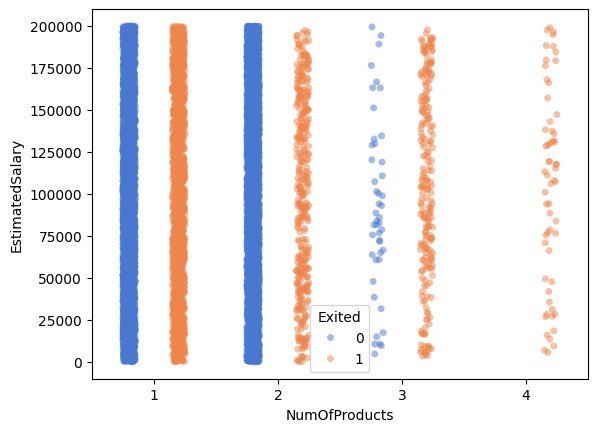

In [45]:
sns.stripplot(data=df1, x='NumOfProducts', y='EstimatedSalary', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

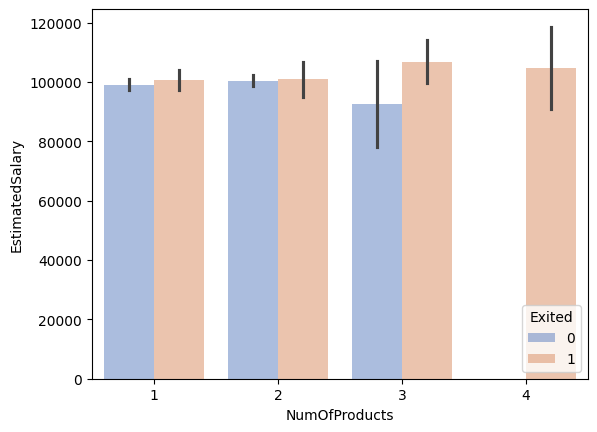

In [46]:
sns.barplot(data=df1, x='NumOfProducts', y='EstimatedSalary', hue='Exited', dodge=True,
                alpha=0.5, palette='muted')

- As previously observed, all customers with 4 products from the bank left, regardless of their estimated salary
- Few customers with 3 products remained with the bank, while more left.
- More customers stayed than left among those who purchased 2 products and had a maximum estimated salary of 100,000
- Approximately half of customers with one product stayed, while the other half left.
- **Note** : Estimated salaries below 200,000 appear inconsistent and will be preprocessed later

<Axes: xlabel='Age', ylabel='CreditScore'>

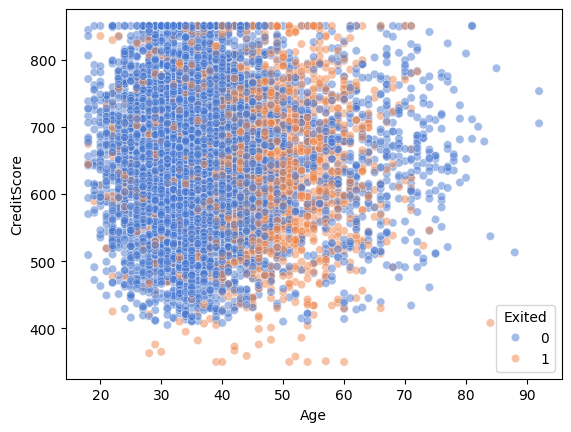

In [47]:
sns.scatterplot(data=df1, x='Age', y='CreditScore', hue='Exited',
               marker='o', alpha=0.5, palette='muted')

- The largest customer population that left the bank is aged between 40 and 60, regardless of credit score.
- Customers with poor credit scores below 400 who left the bank were primarily aged between 30 and 60

<Axes: xlabel='Tenure', ylabel='Balance'>

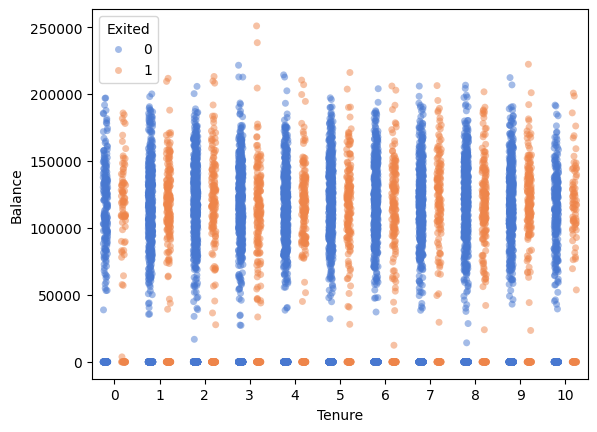

In [48]:
sns.stripplot(data=df1, x='Tenure', y='Balance', hue='Exited', dodge=True,
              jitter=True, marker='o', alpha=0.5, palette='muted')

<Axes: xlabel='Tenure', ylabel='Balance'>

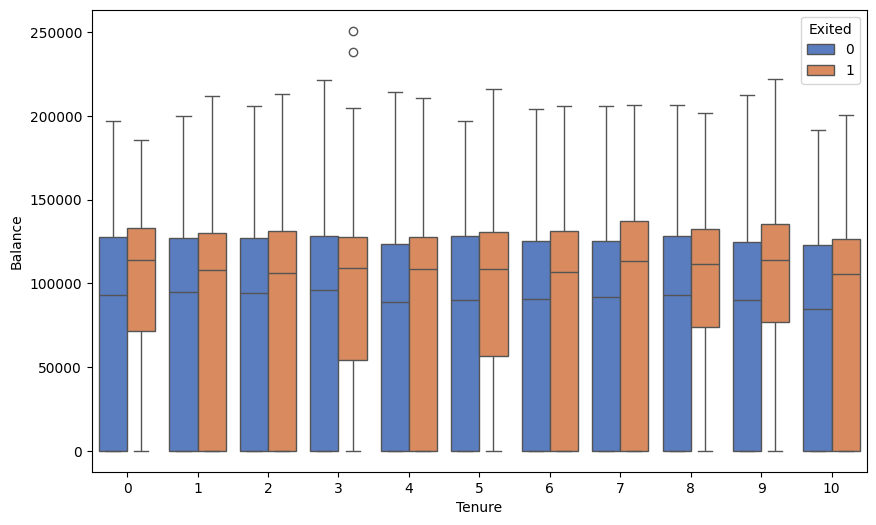

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Tenure', y='Balance', hue='Exited', dodge=True,
                 palette='muted')

- Two customers with high balances have been with the bank for three years
- Most customers who left the bank after various tenures had a median balance exceeding 120,000. Additionally, 25% of customers with 0, 3, 5, 8, or 9 years at the bank held balances over 55,000.
- Customers who remained with the bank had a similar median balance of less than 100,000 across all tenure categories
-For customers with 1, 4, 6, 7, or 10 years at the bank, those who left had a slightly higher 75th percentile balance compared to those who stayed.
- For customers with 1, 4, 6, 7, or 10 years at the bank, the median and 75th percentile of their balances were slightly higher for those who left compared to those who stayed.

<Axes: xlabel='CreditScore', ylabel='Balance'>

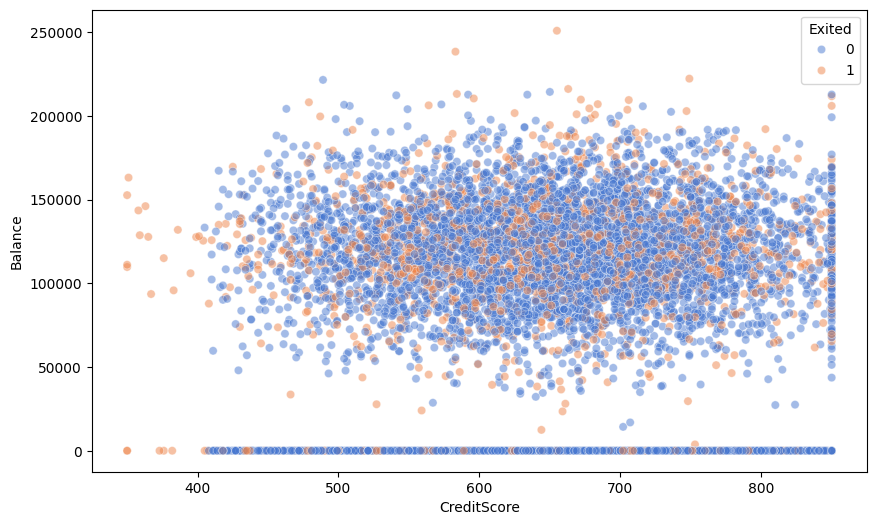

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='CreditScore', y='Balance', hue='Exited', marker='o', alpha=0.5, palette='muted')

- Customers with poor credit scores, typically below 400, and balances between 90,000 and 170,000 were more likely to leave the bank.
- Exited customers exhibited a wide range of credit scores and balances, making it difficult to draw additional conclusions beyond those previously mentioned

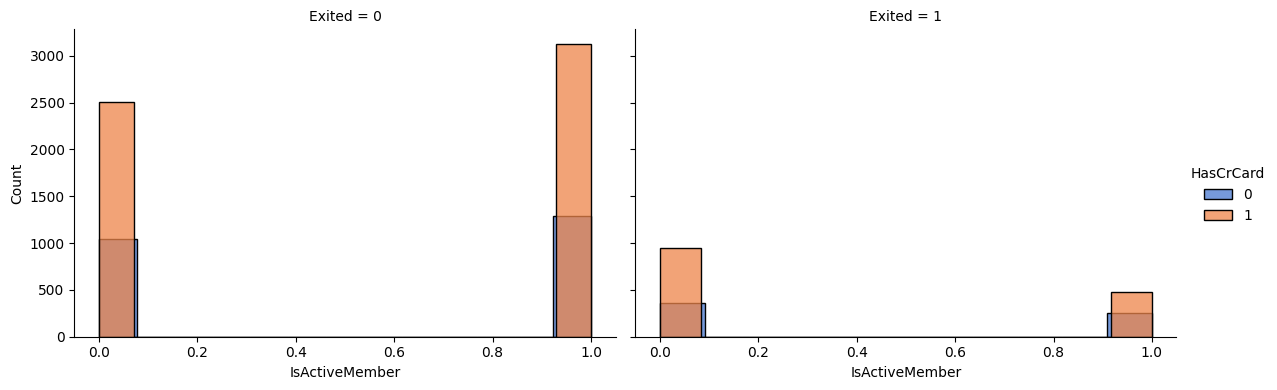

In [51]:
gg = sns.FacetGrid(df1, col='Exited', hue='HasCrCard', palette='muted', height=4, aspect=1.5)
gg.map(sns.histplot, 'IsActiveMember')
gg.add_legend()

Approximately 650 customers with credit cards who left the bank were active members, compared to over 3000 active members who stayed. However, there were nearly 1000 non-active customers with credit cards who left, and 2500 non-active customers with credit cards who stayed.
- **NOTE** : Whether a customer is an active member could influence their churn from the bank

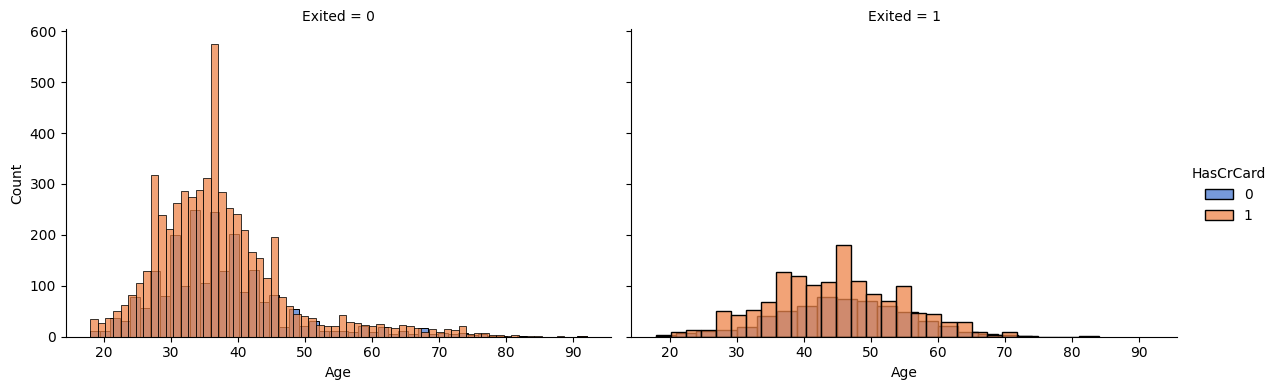

In [52]:
gg1 = sns.FacetGrid(df1, col='Exited', hue='HasCrCard', palette='muted', height=4, aspect=1.5)
gg1.map(sns.histplot, 'Age')
gg1.add_legend()

almost half of the customers in each age category who had credit cards left the bank

## Data Preprocessing

In [53]:
df2=df1.copy()

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [55]:
df2.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [56]:
mn_salary = df2['EstimatedSalary'].min()
# Condition: Examine salaries greater than the minimum and less than 15,000.
count_mn_salary = df2['EstimatedSalary'] < 15000 #df['EstimatedSalary'] > mn_salary) &
count_mn_salary.sum()

750

We have approximately 750 estimated salaries below 15,000. Given that the minimum wage in the country is over 25,000, we can treat these low values as outliers and impute them using KNN imputation to improve the overall estimate.



In [57]:
df2['EstimatedSalary']=df2['EstimatedSalary'].apply(lambda x: np.nan if x < 15000 else x)

In [58]:
df2.isnull().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    750
Exited               0
dtype: int64

In [59]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)# We're using 10 nearest neighbor values based on the number of columns
df2['EstimatedSalary'] = imputer.fit_transform(df2[['EstimatedSalary']])

In [60]:
df2.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

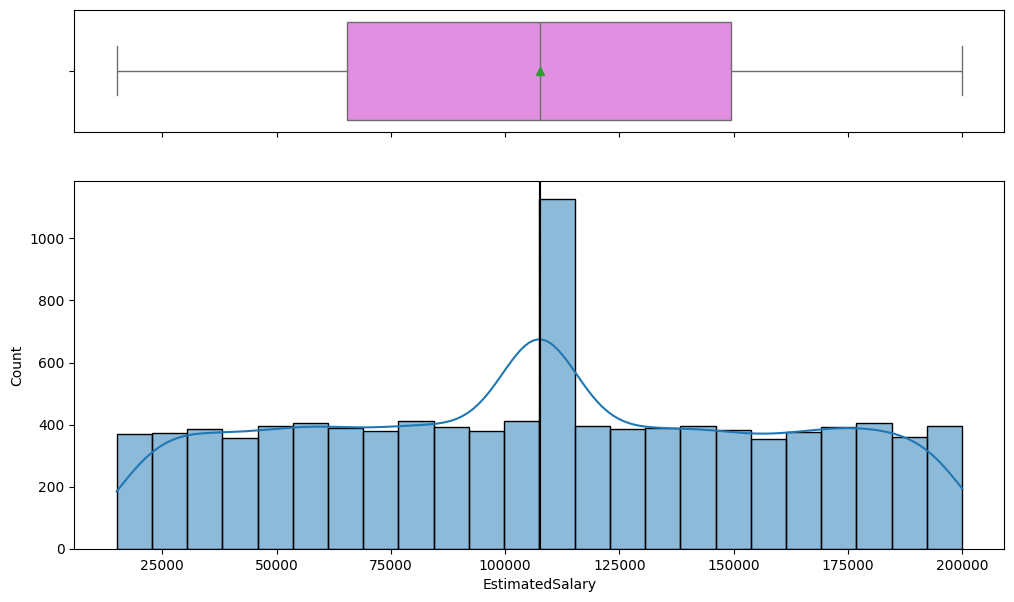

In [61]:
histogram_boxplot(df2, 'EstimatedSalary',kde=True)

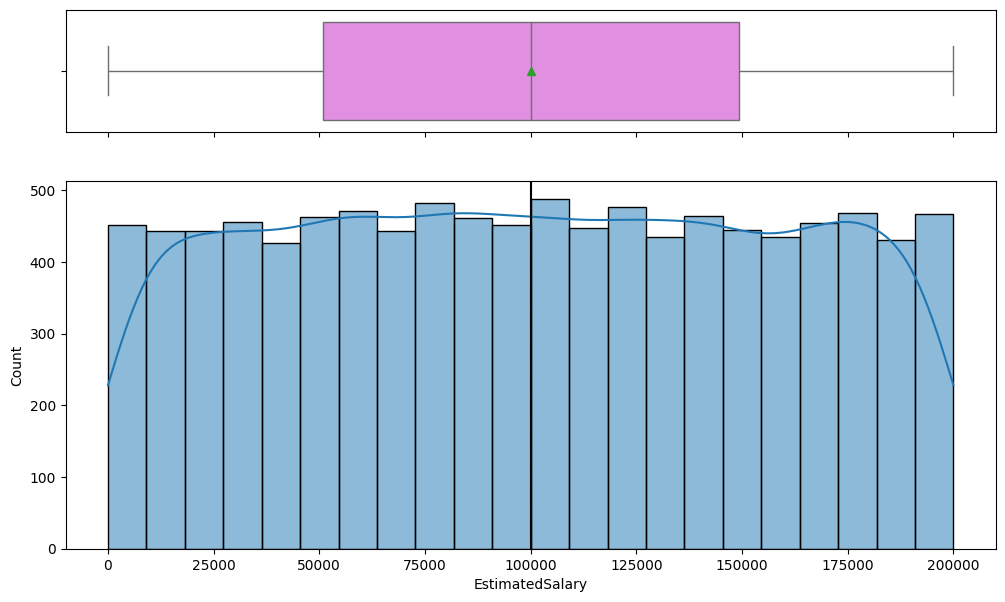

In [131]:
histogram_boxplot(df1, 'EstimatedSalary',kde=True)# the previous distribution

Imputing more missing values with the median can alter the distribution of the estimated values

### Train-validation-test Split

In [63]:
X=df2.drop(columns='Exited',axis=1)
y=df2['Exited']

In [64]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [65]:
y.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

The target variable is imbalanced and requires stratification during splitting

In [66]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [67]:
print(f'shape of X_temp {X_temp.shape} and shape of X_test {X_test.shape}')
print(f'shape of y_temp {y_temp.shape} and shape of y_test {y_test.shape}')

shape of X_temp (8000, 10) and shape of X_test (2000, 10)
shape of y_temp (8000,) and shape of y_test (2000,)


### Dummy Variable Creation and Data Normalization

Splitting the data before applying dummy encoding and normalization is crucial to prevent data leakage

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,  RobustScaler
from sklearn.compose import ColumnTransformer

In [133]:
# Define the columns to be transformed
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

In [134]:
#Create a transformer for categorical features (One-Hot Encoding)
categorical_transformer = OneHotEncoder(drop='first')
# Create a transformer for numerical features (Normalization)
numerical_transformer = RobustScaler()  # Standardize features by removing the mean and scaling to unit variance

In [135]:
#Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

In [136]:
#Create a pipeline that only includes the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [137]:
# finally fit the pipeline to the data_train
pipeline.fit(X_temp)
# last step is to transform the data_train
X_transformed_temp = pipeline.transform(X_temp)

In [138]:
# Extract column names from OneHotEncoder and StandardScaler
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
numerical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out(numerical_features)

# Combine feature names
transformed_columns = list(categorical_feature_names) + list(numerical_feature_names)

# Convert the transformed NumPy array to a DataFrame with the correct column names
X_transformed_df_temp = pd.DataFrame(X_transformed_temp, columns=transformed_columns)
X_transformed_df_temp.head()

Geography_Germany  Geography_Spain  Gender_Male  CreditScore       Age  \
0                0.0              1.0          0.0    -0.410448  3.250000   
1                0.0              0.0          1.0    -0.276119  1.000000   
2                0.0              1.0          1.0    -1.537313  2.083333   
3                0.0              0.0          0.0    -0.798507  0.250000   
4                0.0              0.0          1.0     0.708955  0.000000   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0     0.8  0.292288            0.0        0.0             0.0         0.000000  
1    -0.8 -0.758319            1.0        0.0            -1.0         1.016473  
2    -0.8 -0.256381            0.0        0.0             0.0        -0.371887  
3     0.4 -0.758319            0.0       -1.0             0.0         0.640675  
4    -0.6 -0.758319            1.0        0.0            -1.0         0.426404

In [139]:
# split the data_temp into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_transformed_df_temp, y_temp, test_size=0.2, random_state=1,stratify=y_temp)

In [140]:
print(f'shape of X_train {X_train.shape} and shape of X_validation {X_val.shape}')
print(f'shape of y_train {y_train.shape} and shape of y_validation {y_val.shape}')

shape of X_train (6400, 11) and shape of X_validation (1600, 11)
shape of y_train (6400,) and shape of y_validation (1600,)


In [141]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_transformed_df_temp, y_temp)

# split SMOTE dataset
X_strain, X_sval, y_strain, y_sval = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)

In [142]:
print(f'shape of X_train {X_strain.shape} and shape of X_validation {X_sval.shape}')
print(f'shape of y_train {y_strain.shape} and shape of y_validation {y_sval.shape}')

shape of X_train (10192, 11) and shape of X_validation (2548, 11)
shape of y_train (10192,) and shape of y_validation (2548,)


In [143]:
X_train.shape

(6400, 11)

In [144]:
X_transformed_df_temp .shape

(8000, 11)

In [145]:
print(X_train.shape)
print(X_val.shape)

(6400, 11)
(1600, 11)


In [146]:
print('total target shape : ',y.shape)
print('target for train : ',y_train.shape)
print('target validation :',y_val.shape)
print('target for test :',y_test.shape)

total target shape :  (10000,)
target for train :  (6400,)
target validation : (1600,)
target for test : (2000,)


In [147]:
y.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

**Conclusion** :    
- A pipeline was created to sequentially apply one-hot encoding and normalization to the data.
- The pipeline was fitted on the training data (X_train) and then transformed both the training and validation sets (X_train and X_val).
- The transformed data was converted back to a DataFrame format for further analysis.
- The resulting DataFrame has 11 columns.
- The processed data is now ready to be fed into the model.

## Model Building

### Model Evaluation Criterion

- From the busness's context, our primary goal is to identify potential churners. To achieve this, we must minimize false negatives.

- **False Negatives**: Customers who are predicted to not churn but actually do.
- - Impact: Missed opportunities for intervention, leading to potential revenue loss.
- **False Positives**: Customers who are predicted to churn but do not.
- - Impact: Wasted resources on unnecessary interventions, potentially alienating customers.

**Conclusion and Performance Metric**

- Primary Metric: ***Recall*** (minimizing false negatives) due to the high cost of missing potential churners.
- Secondary Metrics: ***Accuracy***, ***precision***, and ***F1-score*** for a more comprehensive evaluation.



### Utility Functions

In [84]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [85]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [86]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

### Neural Network with SGD Optimizer

In [148]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Recall

In [149]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [150]:
#initialize the model
model = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=128, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))

# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (churn or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))

In [151]:
# Compile the model with SGD optimizer, binary crossentropy loss, and recall as the metric
model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=[Recall()])

In [152]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
import time

batch_size = 64
epochs = 100

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()

# Fitting the model.
history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=batch_size,
    epochs=epochs
)
# model.fit(X_train, y_train, validation_data=(X_val, y_val))

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6601 - recall: 0.1400 - val_loss: 0.5759 - val_recall: 0.0000e+00
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5596 - recall: 0.0000e+00 - val_loss: 0.5248 - val_recall: 0.0000e+00
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5181 - recall: 0.0000e+00 - val_loss: 0.5052 - val_recall: 0.0000e+00
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5016 - recall: 0.0000e+00 - val_loss: 0.4956 - val_recall: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4924 - recall: 0.0000e+00 - val_loss: 0.4878 - val_recall: 0.0000e+00
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4846 - recall: 0.0000e+00 - val_loss: 0.4803 - val_recall: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4768 - recall: 0.0000e+00 - val_loss: 0.4728 - val_recall: 0.0000e+00
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4691 - rec

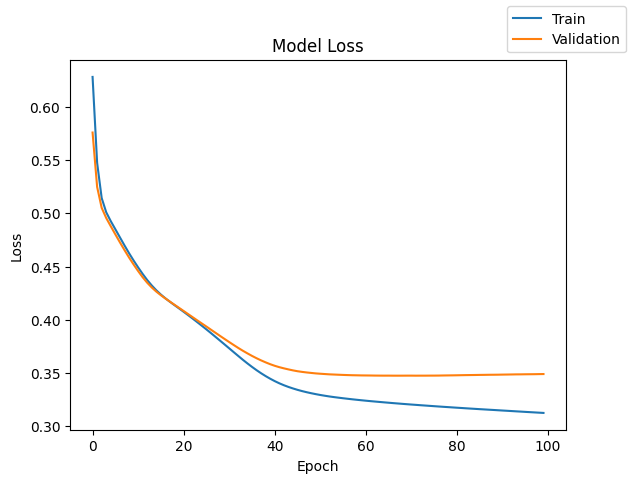

In [154]:
plot(history,'loss')

As the number of epochs increases, the loss function typically decreases, which is the desired outcome

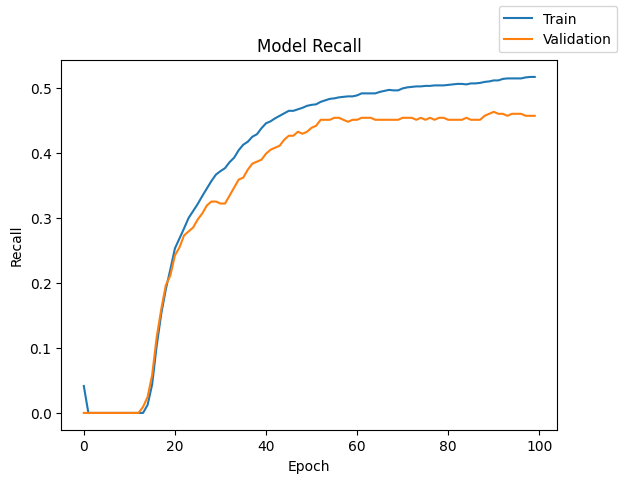

In [155]:
plot(history, 'recall')

Even though the desired recall level has not been achieved, the model should still converge

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [156]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [157]:
#initialize the model
model1 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(units=128, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=16,activation='relu'))
model1.add(Dense(units=8,activation='relu'))


# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (churn or not)
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1,activation='sigmoid'))

In [158]:
from tensorflow.keras.optimizers import Adam

In [159]:
# Compile the model with SGD optimizer, binary crossentropy loss, and recall as the metric
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[Recall()])

In [99]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
time.time() #returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()
epochs1=150
# Fitting the model.
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=epochs1,
    verbose=2
)
time.time() # returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()
training_duration1=end-start

Epoch 1/150
100/100 - 3s - 34ms/step - loss: 0.4735 - recall: 0.0000e+00 - val_loss: 0.4234 - val_recall: 0.0000e+00
Epoch 2/150
100/100 - 0s - 3ms/step - loss: 0.4082 - recall: 0.0107 - val_loss: 0.3934 - val_recall: 0.0798
Epoch 3/150
100/100 - 0s - 2ms/step - loss: 0.3742 - recall: 0.4057 - val_loss: 0.3670 - val_recall: 0.4387
Epoch 4/150
100/100 - 0s - 3ms/step - loss: 0.3494 - recall: 0.5107 - val_loss: 0.3587 - val_recall: 0.4509
Epoch 5/150
100/100 - 0s - 3ms/step - loss: 0.3385 - recall: 0.5153 - val_loss: 0.3554 - val_recall: 0.4785
Epoch 6/150
100/100 - 0s - 3ms/step - loss: 0.3319 - recall: 0.5253 - val_loss: 0.3567 - val_recall: 0.4785
Epoch 7/150
100/100 - 0s - 3ms/step - loss: 0.3274 - recall: 0.5276 - val_loss: 0.3581 - val_recall: 0.4785
Epoch 8/150
100/100 - 0s - 2ms/step - loss: 0.3233 - recall: 0.5299 - val_loss: 0.3600 - val_recall: 0.4908
Epoch 9/150
100/100 - 0s - 2ms/step - loss: 0.3201 - recall: 0.5383 - val_loss: 0.3609 - val_recall: 0.4816
Epoch 10/150
100/10

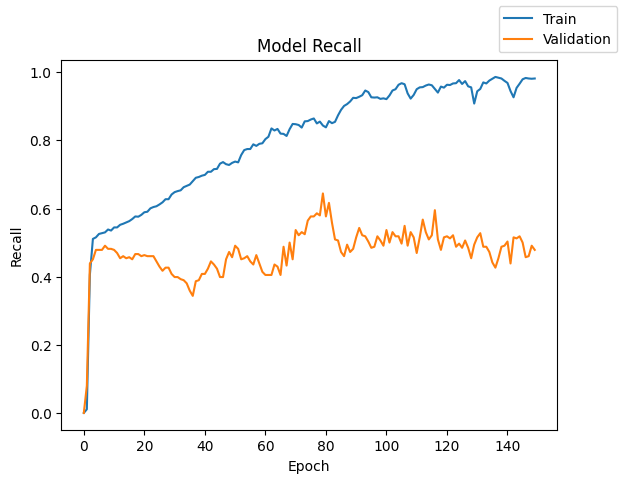

In [161]:
plot(history1, 'recall')

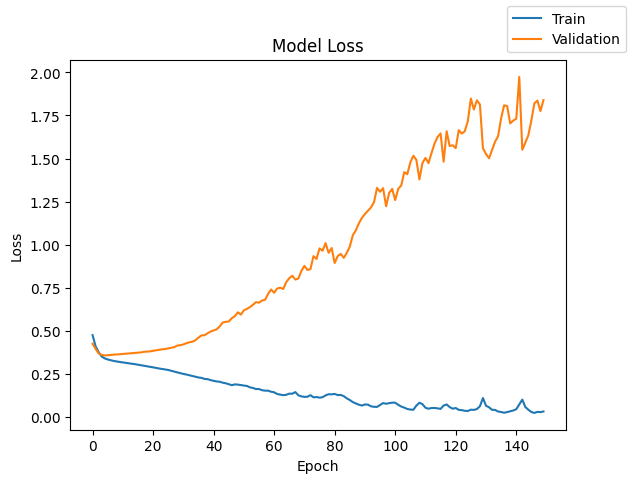

In [162]:
plot(history1,'loss')

he model is performing well on the training data but poorly on the validation or test data, indicating overfitting

### Neural Network with Adam Optimizer and Dropout

In [163]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [164]:
from tensorflow.keras.layers import Dropout

# Initialize the model
model2 = Sequential()

# 1st hidden layer
model2.add(Dense(units=256, input_dim=11, activation='relu'))
model2.add(Dropout(0.4))
# 2end hidden layer
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.4))  # Add dropout with a 50% rate

# 3d hidden layer
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(0.4))  # Add dropout with a 50% rate

# 4th hidden layer
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.4))  # Add dropout with a 50% rate

# 5th layer
model2.add(Dense(units=16, activation='relu'))
model2.add(Dropout(0.4))

# 6th hidden layer
model2.add(Dense(units=8, activation='relu'))
model2.add(Dropout(0.4))
# Output layer
model2.add(Dense(1, activation='sigmoid'))


In [165]:
# Compile the model with SGD optimizer, binary crossentropy loss, and recall as the metric
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[Recall()])#learning_rate=0.0001

In [166]:
time.time() # returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()
epochs1=150
# Fitting the model.
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=epochs1,
    verbose=2
)
time.time() #returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()
training_duration2 =end-start

Epoch 1/150
100/100 - 6s - 64ms/step - loss: 0.5989 - recall: 0.1334 - val_loss: 0.4836 - val_recall: 0.0000e+00
Epoch 2/150
100/100 - 1s - 9ms/step - loss: 0.5147 - recall: 0.0130 - val_loss: 0.4480 - val_recall: 0.0000e+00
Epoch 3/150
100/100 - 0s - 4ms/step - loss: 0.4924 - recall: 0.0138 - val_loss: 0.4285 - val_recall: 0.0000e+00
Epoch 4/150
100/100 - 0s - 4ms/step - loss: 0.4739 - recall: 0.0360 - val_loss: 0.4091 - val_recall: 0.0061
Epoch 5/150
100/100 - 0s - 4ms/step - loss: 0.4574 - recall: 0.1434 - val_loss: 0.3848 - val_recall: 0.3344
Epoch 6/150
100/100 - 1s - 6ms/step - loss: 0.4365 - recall: 0.2316 - val_loss: 0.3695 - val_recall: 0.3497
Epoch 7/150
100/100 - 0s - 4ms/step - loss: 0.4232 - recall: 0.3106 - val_loss: 0.3781 - val_recall: 0.4540
Epoch 8/150
100/100 - 0s - 4ms/step - loss: 0.4165 - recall: 0.3252 - val_loss: 0.3604 - val_recall: 0.3466
Epoch 9/150
100/100 - 0s - 4ms/step - loss: 0.3993 - recall: 0.3275 - val_loss: 0.3576 - val_recall: 0.3773
Epoch 10/150
10

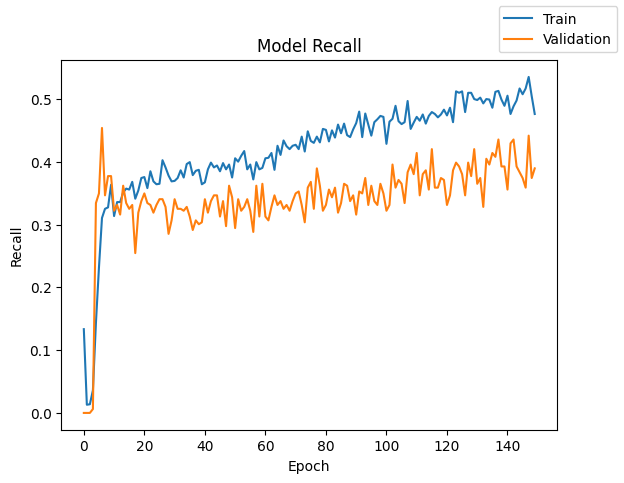

In [167]:
plot(history2,'recall')

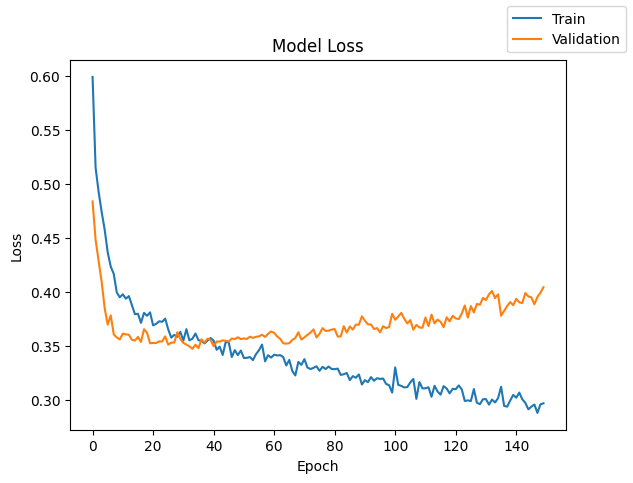

In [168]:
plot(history2,'loss')

The model's instability might be due to imbalanced data and the learning rate.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [169]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [170]:
# Initialize the model
model3 = Sequential()

# Input layer and the first hidden layer
model3.add(Dense(units=256, input_dim=11, activation='relu'))
#model3.add(Dropout(0.5))  # Add dropout with a 50% rate

# Second hidden layer
model3.add(Dense(units=128, activation='relu'))
#model3.add(Dropout(0.5))  # Add dropout with a 50% rate

# Third hidden layer
model3.add(Dense(units=64, activation='relu'))
#model3.add(Dropout(0.5))  # Add dropout with a 50% rate

# Fourth hidden layer
model3.add(Dense(units=32, activation='relu'))
#model3.add(Dropout(0.5))  # Add dropout with a 50% rate

# Fifth hidden layer
model3.add(Dense(units=16, activation='relu'))
#model3.add(Dropout(0.5))

# sixth hidden layer
model3.add(Dense(units=8, activation='relu'))
#model3.add(Dropout(0.5))
# Output layer
model3.add(Dense(1, activation='sigmoid'))

In [171]:
# Compile the model with SGD optimizer, binary crossentropy loss, and recall as the metric
model3.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=[Recall()])

In [172]:
time.time() # returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()
epochs1=150
# Fitting the model.
history3 = model3.fit(
    X_strain, y_strain,
    validation_data=(X_sval,y_sval),
    batch_size=64,
    epochs=epochs1,
    verbose=2
)
time.time()# returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()
training_duration3 =end-start

Epoch 1/150
160/160 - 2s - 15ms/step - loss: 0.6880 - recall: 0.8328 - val_loss: 0.6803 - val_recall: 0.8016
Epoch 2/150
160/160 - 1s - 5ms/step - loss: 0.6698 - recall: 0.8314 - val_loss: 0.6547 - val_recall: 0.7796
Epoch 3/150
160/160 - 1s - 4ms/step - loss: 0.6392 - recall: 0.7863 - val_loss: 0.6162 - val_recall: 0.7702
Epoch 4/150
160/160 - 1s - 4ms/step - loss: 0.6013 - recall: 0.7535 - val_loss: 0.5755 - val_recall: 0.7412
Epoch 5/150
160/160 - 1s - 4ms/step - loss: 0.5668 - recall: 0.7305 - val_loss: 0.5427 - val_recall: 0.7302
Epoch 6/150
160/160 - 0s - 2ms/step - loss: 0.5394 - recall: 0.7250 - val_loss: 0.5177 - val_recall: 0.7341
Epoch 7/150
160/160 - 0s - 2ms/step - loss: 0.5172 - recall: 0.7335 - val_loss: 0.4975 - val_recall: 0.7435
Epoch 8/150
160/160 - 1s - 4ms/step - loss: 0.4970 - recall: 0.7464 - val_loss: 0.4797 - val_recall: 0.7514
Epoch 9/150
160/160 - 1s - 5ms/step - loss: 0.4781 - recall: 0.7580 - val_loss: 0.4647 - val_recall: 0.7592
Epoch 10/150
160/160 - 0s -

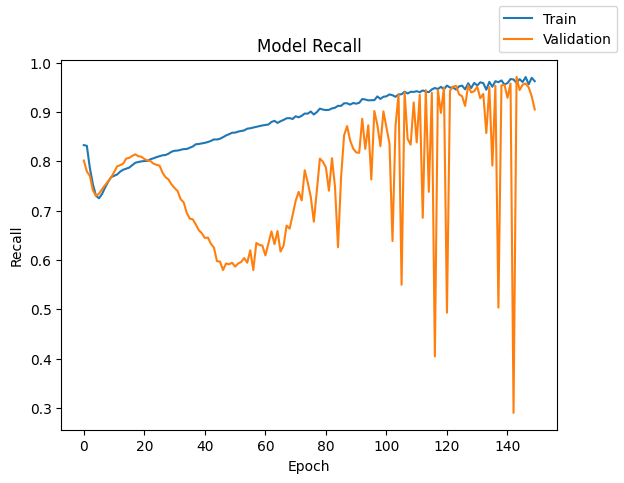

In [173]:
plot(history3,'recall')

The model is heavily overfitted

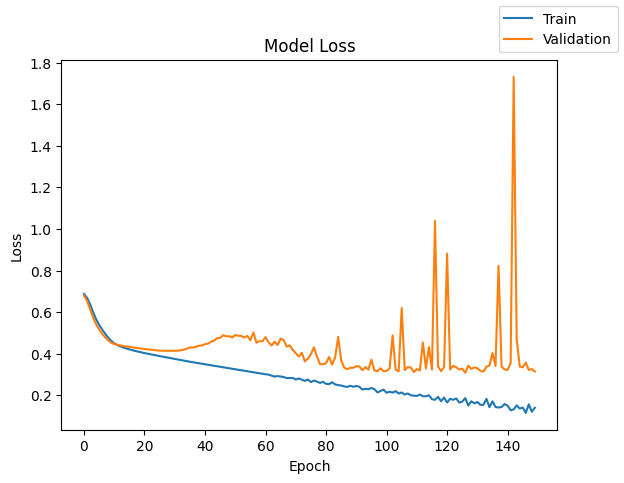

In [174]:
plot(history3,'loss')

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [176]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [177]:
#from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
#smote = SMOTE(random_state=1)
#X_smote, y_smote = smote.fit_resample(X_transformed_df_train, y_train)
# Initialize the model
model4 = Sequential()

# Input layer and the first hidden layer
model4.add(Dense(units=256, input_dim=11, activation='relu'))
#model4.add(Dropout(0.5))  # Add dropout with a 50% rate

# Second hidden layer
model4.add(Dense(units=128, activation='relu'))
#model4.add(Dropout(0.5))  # Add dropout with a 50% rate

# Third hidden layer
model4.add(Dense(units=64, activation='relu'))
#model4.add(Dropout(0.5))  # Add dropout with a 50% rate

# Fourth hidden layer
model4.add(Dense(units=32, activation='relu'))
#model4.add(Dropout(0.5))  # Add dropout with a 50% rate

model4.add(Dense(units=16, activation='relu'))
#model4.add(Dropout(0.5))

model4.add(Dense(units=8, activation='relu'))
#model4.add(Dropout(0.5))

# Output layer
model4.add(Dense(1, activation='sigmoid'))

In [178]:
model4.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[Recall()])#learning_rate=0.001

In [179]:
 time.time() # returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()
epochs1=150
# Fitting the model.
history4 = model4.fit(
    X_strain, y_strain,
    validation_data=(X_sval,y_sval),
    batch_size=64,
    epochs=epochs1,
    verbose=2
)
 time.time()# returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()
training_duration4 =end-start

Epoch 1/150
160/160 - 8s - 51ms/step - loss: 0.5129 - recall: 0.7537 - val_loss: 0.4476 - val_recall: 0.8306
Epoch 2/150
160/160 - 5s - 30ms/step - loss: 0.4378 - recall: 0.7757 - val_loss: 0.4360 - val_recall: 0.8298
Epoch 3/150
160/160 - 1s - 3ms/step - loss: 0.4205 - recall: 0.7914 - val_loss: 0.4276 - val_recall: 0.8188
Epoch 4/150
160/160 - 1s - 4ms/step - loss: 0.4063 - recall: 0.8065 - val_loss: 0.4192 - val_recall: 0.8361
Epoch 5/150
160/160 - 1s - 3ms/step - loss: 0.3919 - recall: 0.8194 - val_loss: 0.4118 - val_recall: 0.8486
Epoch 6/150
160/160 - 0s - 3ms/step - loss: 0.3759 - recall: 0.8395 - val_loss: 0.4047 - val_recall: 0.8510
Epoch 7/150
160/160 - 1s - 4ms/step - loss: 0.3616 - recall: 0.8497 - val_loss: 0.3983 - val_recall: 0.8494
Epoch 8/150
160/160 - 0s - 2ms/step - loss: 0.3445 - recall: 0.8626 - val_loss: 0.3943 - val_recall: 0.8518
Epoch 9/150
160/160 - 0s - 2ms/step - loss: 0.3295 - recall: 0.8718 - val_loss: 0.3879 - val_recall: 0.8667
Epoch 10/150
160/160 - 1s 

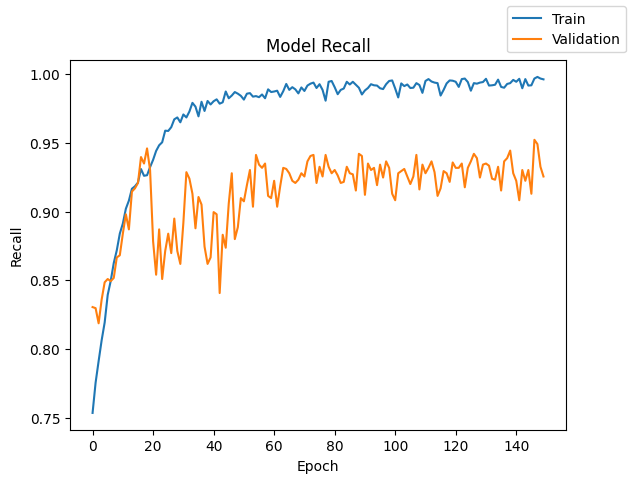

In [180]:
plot(history4,'recall')

the model still overfitting

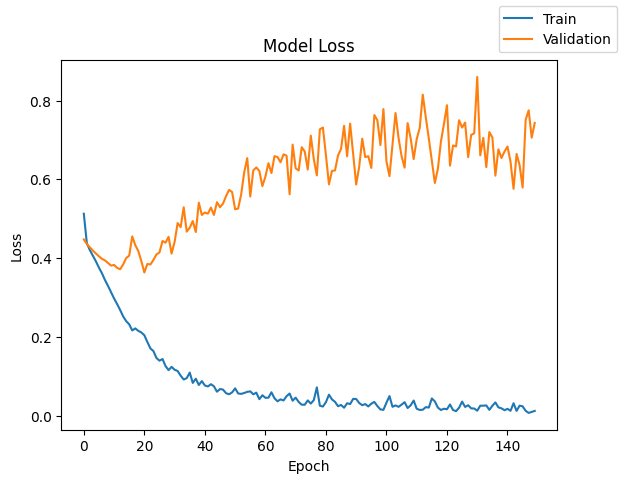

In [181]:
plot(history4,'loss')

The model exhibits overfitting as evidenced by higher loss on the validation set compared to the training set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [182]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

# Initialize the model
model5 = Sequential()

# Input layer and the first hidden layer
#model5.add(Dense(units=256, input_dim=11, activation='relu'))model5.add(Dropout(0.4))  # Add dropout with a 50% rate

# Second hidden layer
#model5.add(Dense(units=128, activation='relu'))
#model5.add(Dropout(0.4))  # Add dropout with a 50% rate

# Third hidden layer
#model5.add(Dense(units=64, activation='relu'))
#model5.add(Dropout(0.4))  # Add dropout with a 50% rate

# Fourth hidden layer
model5.add(Dense(units=64,input_dim=11, activation='relu'))
model5.add(Dropout(0.4))  # Add dropout with a 50% rate

model5.add(Dense(units=32, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(units=8, activation='relu'))
model5.add(Dropout(0.1))

# Output layer
model5.add(Dense(1, activation='sigmoid'))

#compile the model
model5.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=[Recall()])#learning_rate=0.001

time.time() #returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()
epochs1=150
# Fitting the model.
history5 = model5.fit(
    X_strain, y_strain,
    validation_data=(X_sval,y_sval),
    batch_size=128,
    epochs=epochs1,
    verbose=2
)
time.time() #returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()
training_duration5 =end-start

Epoch 1/150
80/80 - 8s - 96ms/step - loss: 0.7009 - recall: 0.8905 - val_loss: 0.6847 - val_recall: 0.9129
Epoch 2/150
80/80 - 5s - 63ms/step - loss: 0.6859 - recall: 0.8420 - val_loss: 0.6719 - val_recall: 0.8573
Epoch 3/150
80/80 - 0s - 3ms/step - loss: 0.6755 - recall: 0.7941 - val_loss: 0.6573 - val_recall: 0.7937
Epoch 4/150
80/80 - 0s - 2ms/step - loss: 0.6639 - recall: 0.7660 - val_loss: 0.6414 - val_recall: 0.7616
Epoch 5/150
80/80 - 0s - 4ms/step - loss: 0.6539 - recall: 0.7366 - val_loss: 0.6246 - val_recall: 0.7459
Epoch 6/150
80/80 - 0s - 4ms/step - loss: 0.6416 - recall: 0.7246 - val_loss: 0.6086 - val_recall: 0.7443
Epoch 7/150
80/80 - 0s - 4ms/step - loss: 0.6306 - recall: 0.7034 - val_loss: 0.5949 - val_recall: 0.7310
Epoch 8/150
80/80 - 0s - 3ms/step - loss: 0.6241 - recall: 0.6928 - val_loss: 0.5835 - val_recall: 0.7318
Epoch 9/150
80/80 - 0s - 4ms/step - loss: 0.6087 - recall: 0.6997 - val_loss: 0.5725 - val_recall: 0.7349
Epoch 10/150
80/80 - 1s - 8ms/step - loss: 0

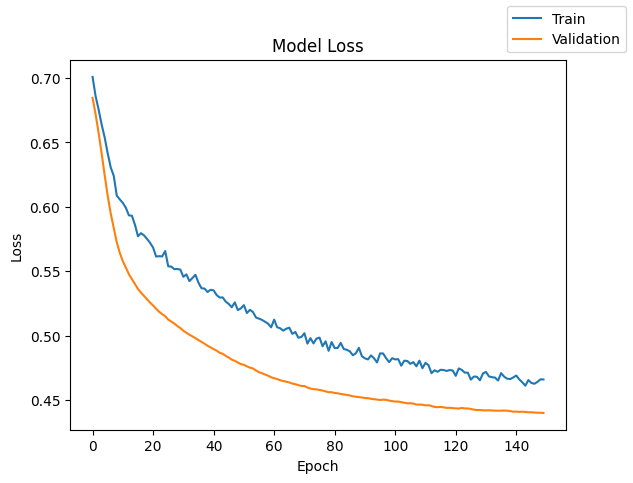

In [183]:
plot(history5,'loss')

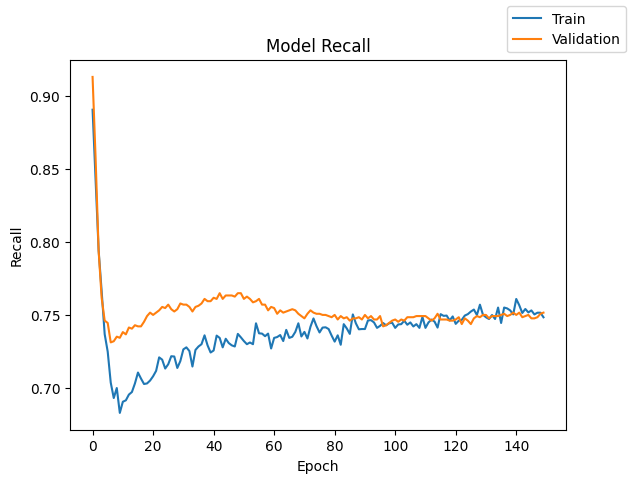

In [184]:
plot(history5,'recall')

###Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout but added early stop and regularization

In [185]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [235]:
# Clear previous session
tf.keras.backend.clear_session()

# Initialize the model
model55 = Sequential()

# Input layer and hidden layers with batch normalization and L2 regularization
model55.add(Dense(units=256, input_dim=11, activation='relu', kernel_regularizer=l2(0.001)))
model55.add(BatchNormalization())
model55.add(Dropout(0.4))

model55.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))
model55.add(BatchNormalization())
model55.add(Dropout(0.3))

model55.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
model55.add(BatchNormalization())
model55.add(Dropout(0.2))

model55.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
model55.add(Dropout(0.2))

model55.add(Dense(units=8, activation='relu'))
model55.add(Dropout(0.1))

# Output layer
model55.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate and additional metrics
model55.compile(optimizer=Adam(learning_rate=0.00005),
               loss='binary_crossentropy',
               metrics=[Recall()])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Start training the model
start = time.time()
epochs1 = 300

history55 = model55.fit(
    X_strain, y_strain,
    validation_data=(X_sval, y_sval),
    batch_size=64,
    epochs=epochs1,
    verbose=2,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

end = time.time()
training_duration55 = end - start


Epoch 1/300
160/160 - 18s - 112ms/step - loss: 1.1504 - recall: 0.8767 - val_loss: 1.0140 - val_recall: 0.9678 - learning_rate: 5.0000e-05
Epoch 2/300
160/160 - 0s - 3ms/step - loss: 1.0771 - recall: 0.8363 - val_loss: 0.9949 - val_recall: 0.8024 - learning_rate: 5.0000e-05
Epoch 3/300
160/160 - 0s - 3ms/step - loss: 1.0202 - recall: 0.8041 - val_loss: 0.9593 - val_recall: 0.7004 - learning_rate: 5.0000e-05
Epoch 4/300
160/160 - 1s - 4ms/step - loss: 0.9945 - recall: 0.7590 - val_loss: 0.9337 - val_recall: 0.6729 - learning_rate: 5.0000e-05
Epoch 5/300
160/160 - 1s - 4ms/step - loss: 0.9775 - recall: 0.7217 - val_loss: 0.9186 - val_recall: 0.6447 - learning_rate: 5.0000e-05
Epoch 6/300
160/160 - 0s - 3ms/step - loss: 0.9571 - recall: 0.7125 - val_loss: 0.9047 - val_recall: 0.6400 - learning_rate: 5.0000e-05
Epoch 7/300
160/160 - 0s - 3ms/step - loss: 0.9444 - recall: 0.6895 - val_loss: 0.8915 - val_recall: 0.6416 - learning_rate: 5.0000e-05
Epoch 8/300
160/160 - 1s - 4ms/step - loss: 0

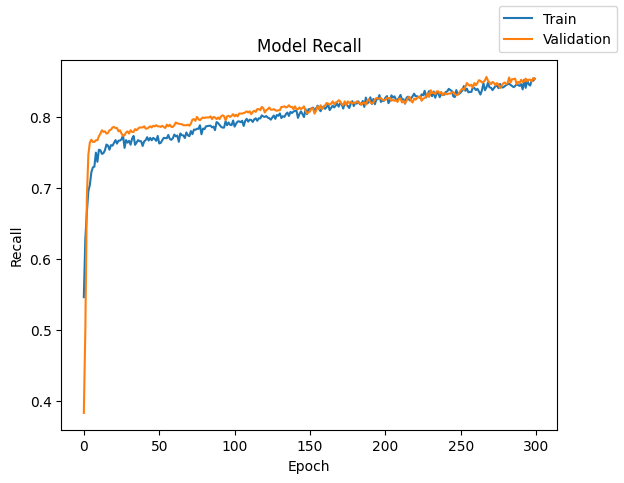

In [187]:
plot(history55,'recall')

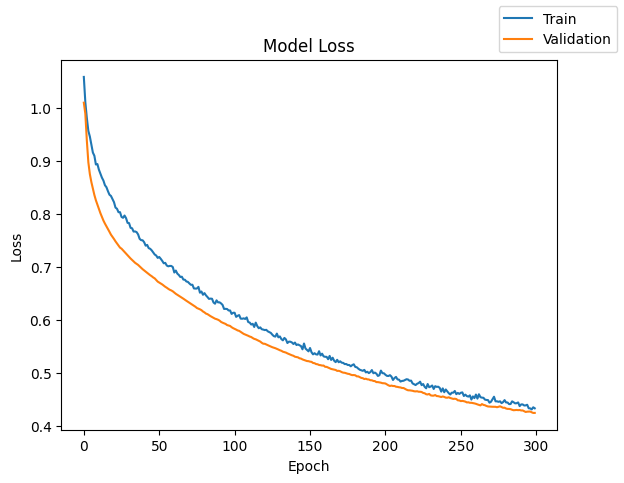

In [188]:
plot(history55,'loss')

The model is approved, especially after examining the recall and loss function growth. The fluctuations are minimal. The loss is 0.4335 and recall is 0.8550 on the training set, while for the validation set, we have a val_loss of 0.4248 and a val_recall of 0.8541.
- Note: Let's fine-tune our model to gain a better understanding of the optimal hyperparameters

### Fine tune the Neural Network

In [189]:
!pip install keras-tuner

In [193]:
import kerastuner as kt
from tensorflow.keras import layers
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

In [194]:
# Clear previous session
tf.keras.backend.clear_session()
def build_model(hp):   # hp refers to hyperParameter
    model11 = Sequential()

    # Tune the number of units in the hidden layers
    model11.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                      input_dim=11, activation='relu', kernel_regularizer=l2(0.001)))
    model11.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    model11.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                      activation='relu', kernel_regularizer=l2(0.001)))
    model11.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))

    model11.add(Dense(units=hp.Int('units_3', min_value=16, max_value=128, step=16),
                      activation='relu', kernel_regularizer=l2(0.001)))
    model11.add(Dropout(hp.Float('dropout_3', 0.1, 0.4, step=0.1)))

    model11.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model11.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                    loss='binary_crossentropy',
                    metrics=[Recall()])
    return model11

In [195]:
# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective=kt.Objective("val_recall", direction="max"),  # Optimize recall
    max_trials=10,           # Number of different hyperparameter combinations to try
    executions_per_trial=3,  # Number of executions for each trial
    directory=None,      # Directory to save the tuner results
    project_name='model_tuning'
)



In [196]:
# Start the hyperparameter search
tuner.search(
    X_strain, y_strain,          # Training data
    epochs=50,                   # Number of epochs to train each model
    batch_size=64,               # Batch size
    validation_data=(X_sval, y_sval)  # Validation data
)


Trial 10 Complete [00h 01m 58s]
val_recall: 0.8622222145398458

Best val_recall So Far: 0.8724183042844137
Total elapsed time: 00h 19m 25s


In [197]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hyperparameters.values)

Best hyperparameters:
{'units': 480, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 16, 'dropout_3': 0.2, 'learning_rate': 0.001}


In [198]:
# Print the summary of the best model
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 480)                 │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          61,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,409 (271.13 KB)

 Trainable params: 69,409 (271.13 KB)

 Non-trainable params: 0 (0.00 B)

In [221]:
# Clear previous session
tf.keras.backend.clear_session()
# Build the model using the best hyperparameters
def build_best_model():
    model6 = Sequential()

    # First hidden layer with 480 units and 0.2 dropout
    model6.add(Dense(units=480, input_dim=11, activation='relu', kernel_regularizer=l2(0.001)))
    model6.add(Dropout(0.2))

    # Second hidden layer with 128 units and ~0.3 dropout
    model6.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))
    model6.add(Dropout(0.3))

    # Third hidden layer with 16 units and 0.2 dropout
    model6.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)))
    model6.add(Dropout(0.2))

    # Output layer with 1 unit and sigmoid activation for binary classification
    model6.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and the best learning rate
    model6.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=[Recall()])

    return model6

# build the best model
model6 = build_best_model()

In [222]:
# we want to expance number of epochs but use early stop
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [223]:
# fit our best model to the data for train again
start=time.time()
history6 = model6.fit(
    X_strain, y_strain,
    validation_data=(X_sval, y_sval),
    batch_size=32,
    epochs=200,
    verbose=2,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)
end = time.time()
training_duration6 = end - start

Epoch 1/200
319/319 - 8s - 25ms/step - loss: 0.6732 - recall: 0.7580 - val_loss: 0.5465 - val_recall: 0.7953 - learning_rate: 0.0010
Epoch 2/200
319/319 - 1s - 2ms/step - loss: 0.5401 - recall: 0.7543 - val_loss: 0.5045 - val_recall: 0.8008 - learning_rate: 0.0010
Epoch 3/200
319/319 - 1s - 2ms/step - loss: 0.5120 - recall: 0.7641 - val_loss: 0.4890 - val_recall: 0.7906 - learning_rate: 0.0010
Epoch 4/200
319/319 - 1s - 2ms/step - loss: 0.4983 - recall: 0.7658 - val_loss: 0.4853 - val_recall: 0.8039 - learning_rate: 0.0010
Epoch 5/200
319/319 - 1s - 2ms/step - loss: 0.4907 - recall: 0.7672 - val_loss: 0.4766 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 6/200
319/319 - 1s - 2ms/step - loss: 0.4859 - recall: 0.7725 - val_loss: 0.4730 - val_recall: 0.8078 - learning_rate: 0.0010
Epoch 7/200
319/319 - 1s - 2ms/step - loss: 0.4812 - recall: 0.7802 - val_loss: 0.4732 - val_recall: 0.8039 - learning_rate: 0.0010
Epoch 8/200
319/319 - 1s - 2ms/step - loss: 0.4767 - recall: 0.7814 - val_l

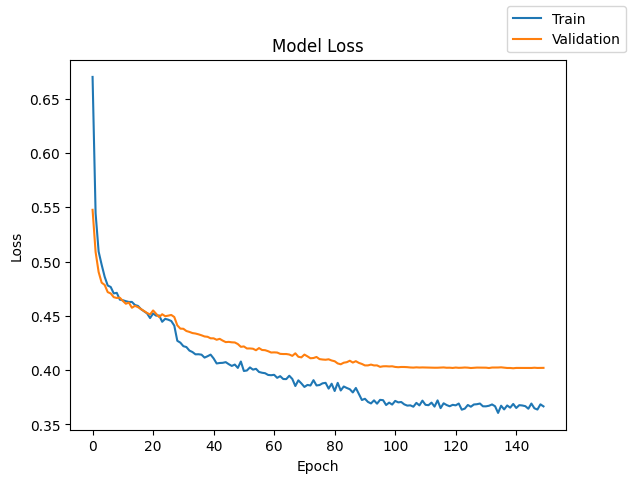

In [224]:
plot(history_b,'loss')

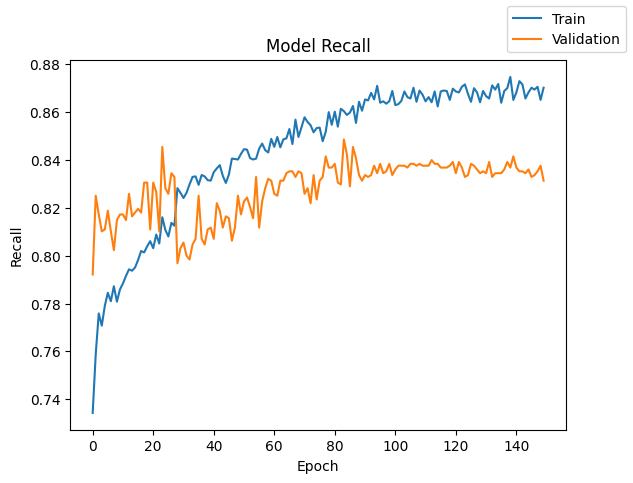

In [225]:
plot(history_b,'recall')

After fine-tuning our model and finding the optimal hyperparameters, we can see from the loss and recall plots that the model is still not fully satisfied. To achieve the best performance, we need to invest more effort in refining the model. While the previous model was the best we could achieve at that time, further improvements are possible

train the model with the best parameter

Despite fluctuations, this algorithm is promising, but its generalization ability will be revealed by the test set

## Model Performance Comparison and Final Model Selection

In [226]:
# Dictionary of models and their corresponding history objects
model_histories = {
    'model1': history1,  #  actual history objects
    'model2': history2,
    'model3': history3,
    'model4': history4,
    'model5': history5,
    'model6': history6
}

# Dictionary of training durations for each model
training_durations = {
    'model1': training_duration1,
    'model2': training_duration2,
    'model3': training_duration3,
    'model4': training_duration4,
    'model5': training_duration5,
    'model6': training_duration6,

}

# Initialize a list to store results
results_list = []

# Iterate through each model
for model_name, history in model_histories.items():
    # Get the metrics and duration for the current model
    if history.history:
        final_loss = history.history['loss'][-1] if 'loss' in history.history else None
        final_recall = history.history['recall'][-1] if 'recall' in history.history else None
        val_loss = history.history['val_loss'][-1] if 'val_loss' in history.history else None
        val_recall = history.history['val_recall'][-1] if 'val_recall' in history.history else None
    else:
        final_loss = final_recall = val_loss = val_recall = None

    training_duration = training_durations.get(model_name, 0)

    # Store the results in a dictionary
    results_list.append({
        'Model': model_name,
        'Final Loss': final_loss,
        'Final Recall': final_recall,
        'Validation Loss': val_loss,
        'Validation Recall': val_recall,
        'Training Time': training_duration
    })

# Convert the results list to a DataFrame for comparison
results_df = pd.DataFrame(results_list)

results_df


Model  Final Loss  Final Recall  Validation Loss  Validation Recall  \
0  model1    0.029587      0.981595         1.839423           0.478528   
1  model2    0.296649      0.476227         0.404160           0.389571   
2  model3    0.140902      0.962316         0.314768           0.905098   
3  model4    0.012300      0.996075         0.743413           0.925490   
4  model5    0.466158      0.748185         0.440216           0.751373   
5  model6    0.363704      0.866143         0.397967           0.841569   

   Training Time  
0      50.755701  
1      55.690934  
2      78.838639  
3      88.983157  
4     216.525600  
5     141.298919

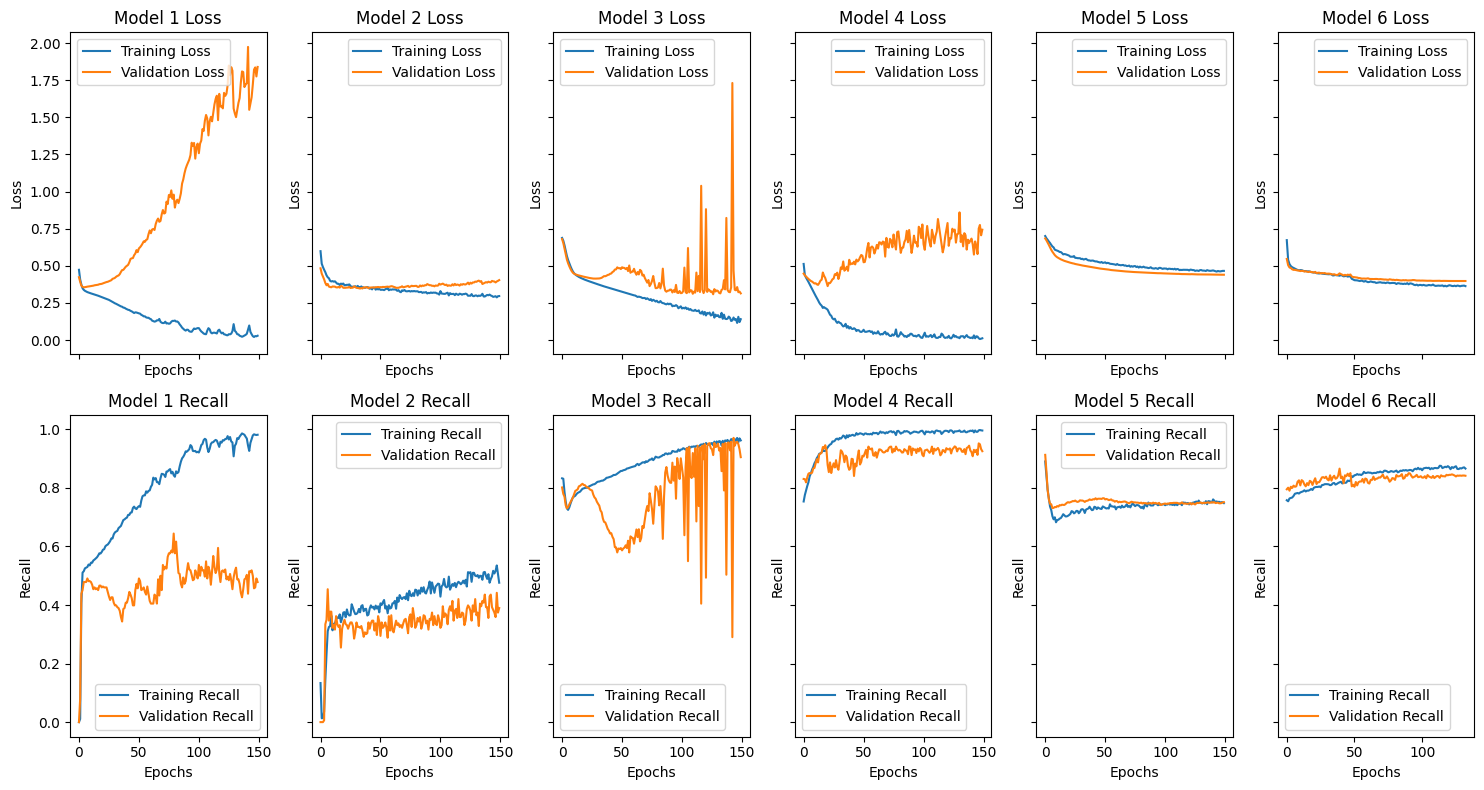

In [227]:
# Define the number of rows and columns for the subplot grid
num_models = 6
num_rows = 2  # We will have two rows: one for loss and one for recall
num_cols = num_models  # Number of columns equals the number of models

# Create a figure and axis array for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8), sharex='col', sharey='row')

# Iterate through models to plot loss and recall side by side
for i in range(1, num_models + 1):
    history = globals().get(f'history{i}')  # Dynamically access history variables
    if history:
        # Plot loss
        ax = axes[0, i-1]  # First row for loss
        ax.plot(history.history['loss'], label='Training Loss')
        ax.plot(history.history['val_loss'], label='Validation Loss')
        ax.set_title(f'Model {i} Loss')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()

        # Plot recall
        ax = axes[1, i-1]  # Second row for recall
        ax.plot(history.history['recall'], label='Training Recall')
        ax.plot(history.history['val_recall'], label='Validation Recall')
        ax.set_title(f'Model {i} Recall')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Recall')
        ax.legend()
    else:
        print(f'No history found for model{i}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


- Model 3 (Balanced Data, SGD Optimizer):

- - Pros: Achieved the best overall results.
- - Cons: Instability, as evidenced by the figure.

- Model 5 (Balanced Data, Adam Optimizer, Dropout):

- - Pros: Demonstrated the best balance of stability, low loss, and high recall.
- - Cons: None mentioned.

- Model 2 (Adam Optimizer, Dropout):

- - Pros: Performed well but may have been underfitting.
- - Cons: Did not reach the optimal recall and loss values.

-  Model6 : fine tunerd model

- - Pros: Provides the lowest loss and highest recall compared to other models.

- - Cons: Inconsistent performance and limited generalizability."

**Conclusion**

- Hyperparameter Tuning: Manual hyperparameter tuning was crucial in achieving these results.
- Iterative Improvement: Continued experimentation and tuning of hyperparameters can lead to further model improvements.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **As a final step, evaluate the chosen model on the test set**

In [228]:
# Ensure consistency by applying the same preprocessing steps to the test set as were used for the training data
X_test['EstimatedSalary']=X_test['EstimatedSalary'].apply(lambda x: np.nan if x < 15000 else x)

# finally fit the pipeline to the data_train
pipeline.fit(X_test)
# last step is to transform the data_train
X_transformed_test = pipeline.transform(X_test)

# Convert the transformed NumPy array to a DataFrame with the correct column names
X_transformed_df_test = pd.DataFrame(X_transformed_test, columns=transformed_columns)
X_transformed_df_test.head()

Geography_Germany  Geography_Spain  Gender_Male  CreditScore       Age  \
0                0.0              1.0          1.0    -1.794118 -0.166667   
1                0.0              1.0          1.0    -0.897059 -0.166667   
2                0.0              0.0          0.0     0.014706 -0.333333   
3                1.0              0.0          0.0    -0.742647  0.500000   
4                1.0              0.0          1.0     0.713235  2.333333   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0    -0.6 -0.774040            1.0        0.0             0.0        -0.542300  
1     0.6  0.161010            0.0        0.0             0.0         0.324792  
2     0.4 -0.067274            0.0        0.0            -1.0         0.336460  
3    -0.2  0.215238            0.0        0.0             0.0        -0.380867  
4    -0.8  0.296144            0.0        0.0             0.0         0.161905

In [229]:
y_test.value_counts()

Exited
0    1593
1     407
Name: count, dtype: int64

In [ ]:
#Fine tuned NN, NN_with_Balanced_Data_Adam_Optimizer_and_Dropout ,NN_with_Balanced_Data_and_Adam_Optimizer , NN_with_Balanced_Data_and_SGD_Optimizer

In [232]:
# Evaluate the models on the test set
chosen_models={'NN_with_Balanced_Data_and_SGD_Optimizer': model3, 'NN_with_Balanced_Data_and_Adam_Optimizer': model4,
              'NN_with_Balanced_Data_Adam_Optimizer_and_Dropout': model5, 'Fine_Tuned_NN':model6}
for model_name, model in chosen_models.items():
    test_loss, test_recall = model.evaluate(X_transformed_df_test, y_test)

    # Print the test loss and recall for each model
    print(f'Test Loss for {model_name}: {test_loss:.4f}')
    print(f'Test Recall for {model_name}: {test_recall:.4f}')
    print('+'*30)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6825 - recall: 0.5654
Test Loss for NN_with_Balanced_Data_and_SGD_Optimizer: 0.6738
Test Recall for NN_with_Balanced_Data_and_SGD_Optimizer: 0.5676
++++++++++++++++++++++++++++++
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4819 - recall: 0.5826
Test Loss for NN_with_Balanced_Data_and_Adam_Optimizer: 1.5788
Test Recall for NN_with_Balanced_Data_and_Adam_Optimizer: 0.5602
++++++++++++++++++++++++++++++
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4607 - recall: 0.7221
Test Loss for NN_with_Balanced_Data_Adam_Optimizer_and_Dropout: 0.4522
Test Recall for NN_with_Balanced_Data_Adam_Optimizer_and_Dropout: 0.6978
++++++++++++++++++++++++++++++
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4865 - recall: 0.7008
Test Loss for Fine_Tuned_NN: 0.4737
Test Recall for Fine_Tuned_NN: 0.6708
++++++++++++++++++++++++++++++


In [236]:
# evaluation metrics on the test set on the model55 with early stop
test_loss, test_recall, = model55.evaluate(X_transformed_df_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Recall: {test_recall}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5332 - recall: 0.6935
Test Loss: 0.5140558481216431
Test Recall: 0.687960684299469


the best model evaluted on unseen data is the NN_with_Balanced_Data_Adam_Optimizer_and_Dropout and still need more manually adjustements  

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1593
           1       0.50      0.70      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



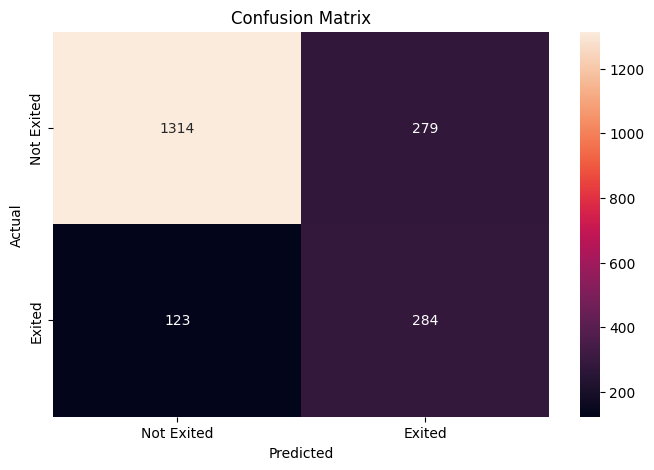

In [237]:
from sklearn.metrics import classification_report, confusion_matrix
test_pred = model5.predict(X_transformed_df_test)
test_pred = (test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Generate the classification report
print(classification_report(y_test, test_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


the bank incurred a loss of 123 customers due to customer churn

**Conclusion**

The model demonstrates strong performance on the training and validation sets, with a final recall of approximately 0.89 and 0.90, respectively. However, when evaluated on the test set, the model's recall drops significantly to around 0.65, indicating potential overfitting. This discrepancy suggests that while the model has learned the patterns present in the training data, it struggles to generalize effectively to unseen data.

The overfitting issue might be due to the model being too complex or not adequately regularized. To improve generalization, several strategies could be explored, such as increasing regularization, simplifying the model architecture, employing more robust cross-validation techniques, and possibly revisiting the data augmentation strategy.

Moving forward, it would be beneficial to refine the model to balance the trade-off between fitting the training data and maintaining generalization to new, unseen data. This may involve hyperparameter tuning, adjusting the model complexity, or employing ensemble techniques

## Actionable Insights and Business Recommendations

**Product Purchase and Churn**:
It has been observed that all customers with 4 products have left the bank. We recommend conducting an in-depth analysis to understand the reasons behind the churn of customers with 3 or 4 products. Developing targeted retention strategies for these customers will be crucial. Consider implementing measures to address any dissatisfaction or specific issues related to having multiple products.

**Age-Based Churn Patterns**:
Customers aged between 40 and 65, particularly those around age 50, show a higher propensity to leave the bank. Tailor your retention efforts to this age group by offering personalized services, targeted incentives, or customized solutions that address their specific needs and concerns.

**Balance and Credit Score**:
Customers with higher balances and poor credit scores are more likely to churn. Adjust your financial products and support strategies to better cater to these high-risk segments. This may include offering specialized financial advice or adjusting credit terms to support these customers more effectively.

**Credit Card Ownership**:
Customers who have purchased 4 products have left the bank regardless of whether they own a credit card. Investigate other factors that may contribute to churn and consider revising your credit card policies. This will help in identifying and addressing underlying issues that could affect customer retention.

**Regional Considerations**:
With a significant customer base in France, Germany, and Spain, it is essential to adapt strategies to reflect regional financial conditions and customer behaviors. Focus on localized marketing efforts and retention strategies tailored to each region to better meet the needs of your diverse customer base.



# ***Model Performance and Improvement Strategies***
**Increase Regularization and Simplify Model**:
To address the overfitting observed in the model, it is recommended to enhance regularization techniques, such as L2 regularization or dropout. Additionally, simplifying the model architecture can improve generalization to new data, ensuring better performance on unseen datasets.

**Enhance Cross-Validation and Data Augmentation**:
Robust cross-validation techniques should be implemented to assess the model's performance across different data subsets. Revising data augmentation strategies will enrich the training dataset, improving the model’s generalization and overall performance.

**Hyperparameter Tuning and Ensemble Methods**:
Detailed hyperparameter tuning is necessary to balance training and test performance. Exploring ensemble methods can enhance model performance by combining predictions from multiple models, leveraging their collective strengths for improved accuracy.

# ***Addressing Target Variable Imbalance***
**Implement Stratified Sampling**:
Maintaining class proportions in both training and testing sets through stratified sampling will address the imbalance in the target variable. This approach ensures a fair evaluation and improves the model’s performance on imbalanced data.

**Impute Low Estimated Salaries**:
Low estimated salaries (below 15,000) should be treated as outliers and imputed using KNN imputation. This process will enhance data quality and ensure that the dataset is representative, leading to more accurate modeling outcomes.






